In [1]:
import matplotlib.pyplot as plt
import pandas as p
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import linregress
from scipy.spatial import distance
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec
import scipy
import sys
import os
from matplotlib.backends.backend_pdf import PdfPages
# from sklearn.decomposition import PCA
from ast import literal_eval
from Bio import SeqIO
from itertools import combinations

%load_ext autoreload
%autoreload 2 

atish_assay_path = '../code/fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

import Levenshtein

sns.set_color_codes()
sns.set_style('white')
sns.set_style('ticks')

In [2]:
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']

# replicates = [1,2,3]
replicates = {'Fit1D-2%':[1,2],
              'Fit1D-5%':[1,2],
              'Fit2D-2%':[1,2],
              'Fit2D-5%':[1,2],
              'Fit3D-2%':[1,2,3],
              'Fit3D-5%':[1,2,3],
              'Fit5D-2%':[1,2,3],
              'Fit5D-5%':[1,2,3]}

timepoints = {'Fit1D-2%':7,
              'Fit1D-5%':7,
              'Fit2D-2%':7,
              'Fit2D-5%':7,
              'Fit3D-2%':3,
              'Fit3D-5%':3,
              'Fit5D-2%':3,
              'Fit5D-5%':3}

In [3]:
ploidy_calls = p.read_csv('../BenomylTest/EvolvingFront_rearray_map_with_ploidy.csv')

In [4]:
merged_fitness = p.read_csv('../2%5%_FitnessMeasurement/EvolvingFront_2%5%FitnessMeasurementData.csv')
time_fitness = p.read_csv('../2%5%_FitnessMeasurement/EvolvingFront_2%5%FitnessMeasurementData_fitnessByTime.csv')

In [5]:
full_cloneID_list = []
full_ploidy_list = []
evo_cond_list = []
anc_list = []

for barcode,cloneID,source,ploidy,evo_cond,anc in zip(merged_fitness['barcode'].values,
                                         merged_fitness['cloneID'].values,
                                         merged_fitness['source_publication'].values,
                                         merged_fitness['ploidy'].values,
                                         merged_fitness['evolution_condition'].values,
                                         merged_fitness['ancestor'].values):
    if source == 'This_study':
        
        
        this_bc = ploidy_calls[ploidy_calls['barcode']==barcode]
        
        if len(this_bc) == 0:
            this_id = np.nan
            full_cloneID_list.append(np.nan)
            full_ploidy_list.append('?')
        elif len(this_bc) > 1:
            print('hmm... more that one found')
            print(this_bc)
            full_cloneID_list.append(this_bc['destination_well'].values[0])
            full_ploidy_list.append(this_bc['ploidy'].values[0])
            this_id = this_bc['destination_well'].values[0]
        else:
            full_cloneID_list.append(this_bc['destination_well'].values[0])
            full_ploidy_list.append(this_bc['ploidy'].values[0])
            this_id = this_bc['destination_well'].values[0]
#         print('this_condition')
        
        bc_low_complexity = barcode.split('_')[0]
        
        entry = tools.new_lowcomplexity_bc_to_entry_dict[bc_low_complexity]
        
        if 'IRA1_NON' in entry:
            anc_list.append('IRA1_NON')
        elif 'IRA1_MIS' in entry:
            anc_list.append('IRA1_MIS')
        elif entry in ['TOR1','CYR1','GPB2']:
            anc_list.append(entry)
            entry = this_id
            
        
        if not p.isnull(entry):
            if 'EVO1D' in entry:
                evo_cond_list.append('Evo1D')
            elif 'EVO2D' in entry:
                evo_cond_list.append('Evo2D')
            elif 'EVO3D' in entry:
                evo_cond_list.append('Evo3D')
            else:
                evo_cond_list.append('unknown')
        else:
            evo_cond_list.append('unknown')
            
        
        
        

    
    else:

        full_cloneID_list.append(cloneID)
        full_ploidy_list.append(ploidy)
        evo_cond_list.append(evo_cond)
        anc_list.append(anc)
        
merged_fitness['cloneID_new'] = full_cloneID_list
merged_fitness['ploidy_new'] = full_ploidy_list
merged_fitness['evolution_condition'] = evo_cond_list
merged_fitness['ancestor'] = anc_list

hmm... more that one found
                           source_well                  destination_well  \
1527   EVO3D_IRA1_NON_R1_T21_Plate1-C5  EVO3D_IRA1_NON_rearray_Plate1-A6   
1645  EVO3D_IRA1_NON_R2_T21_Plate3-C11  EVO3D_IRA1_NON_rearray_Plate2-C4   

                                                barcode  \
1527  ATCACAATAACTAAACTGATTCTTCA_AGGTCAATGGTGAAGGGTT...   
1645  ATCACAATAACTAAACTGATTCTTCA_AGGTCAATGGTGAAGGGTT...   

                                                backups   ploidy  
1527  ['EVO3D_IRA1_NON_R1_T21_Plate1-C5', 'EVO3D_IRA...  haploid  
1645  ['EVO3D_IRA1_NON_R1_T21_Plate1-C5', 'EVO3D_IRA...  haploid  
hmm... more that one found
                          source_well                   destination_well  \
1616  EVO3D_IRA1_NON_R2_T21_Plate1-E4  EVO3D_IRA1_NON_rearray_Plate1-H11   
1641  EVO3D_IRA1_NON_R2_T21_Plate3-B8  EVO3D_IRA1_NON_rearray_Plate2-B12   

                                                barcode  \
1616  ATCACAATAACTAAACTGATTCTTCA_GAGAGAAAACCGAATGG

In [6]:
new_conditions = {'Fit1D_both2%5%':['Fit1D-2%','Fit1D-5%'],
                 'Fit2D_both2%5%':['Fit2D-2%','Fit2D-5%'],
                 'Fit3D_both2%5%':['Fit3D-2%','Fit3D-5%'],
                 'Fit5D_both2%5%':['Fit5D-2%','Fit5D-5%']}


for new_condition,old_conditions in new_conditions.items():
    
    new_f = np.nansum([merged_fitness[f'{condition}_fitness'].values/merged_fitness[f'{condition}_error'].values for condition in old_conditions],axis=0) \
    /np.nansum([1.0/merged_fitness[f'{condition}_error'].values for condition in old_conditions],axis=0)
    
    merged_fitness[f'{new_condition}_fitness'] = new_f
    
    new_error = np.nansum([1.0/merged_fitness[f'{condition}_error'].values for condition in old_conditions],axis=0)**(-1)
    
    merged_fitness[f'{new_condition}_error'] = new_error
    
    new_f = np.nansum([merged_fitness[f'{condition}_fitness_Li2019Neutrals'].values/merged_fitness[f'{condition}_error_Li2019Neutrals'].values for condition in old_conditions],axis=0) \
    /np.nansum([1.0/merged_fitness[f'{condition}_error_Li2019Neutrals'].values for condition in old_conditions],axis=0)
    
    merged_fitness[f'{new_condition}_fitness_Li2019Neutrals'] = new_f
    
    new_error = np.nansum([1.0/merged_fitness[f'{condition}_error_Li2019Neutrals'].values for condition in old_conditions],axis=0)**(-1)
    
    merged_fitness[f'{new_condition}_error_Li2019Neutrals'] = new_error




    

In [7]:
##### FILTER OUT BARCODES THAT ARE SEQUENCING ERRORS OF ANOTHER "REAL" BARCODE

sequencing_error_id = {}
sequencing_error_count = {}

removal_list = []

timepoint_to_use = 'Fit1D-5%-T0'

sorted_ix = np.argsort(merged_fitness[timepoint_to_use])[::-1]


barcodes_sorted_by_tp = merged_fitness['barcode'].values[sorted_ix]

for bc1,bc2 in combinations(barcodes_sorted_by_tp,2):
    this_dist = Levenshtein.distance(str(bc1),str(bc2))
    if this_dist < 4:

        count1 = merged_fitness[merged_fitness['barcode']==bc1][timepoint_to_use].values[0]
        count2 = merged_fitness[merged_fitness['barcode']==bc2][timepoint_to_use].values[0]
        
        if count1 > count2:
            big_bc = f'{bc1}_{count1}'
#             big_count = count1
            small_bc = f'{bc2}_{count2}'
#             small_count = count2
        else:
            small_bc = f'{bc1}_{count1}'
#             small_count = count1
            big_bc = f'{bc2}_{count2}'
#             big_count = count2

        if big_bc in sequencing_error_id.keys():
            if small_bc in sequencing_error_id.keys():
                sequencing_error_id[big_bc] = set.union(sequencing_error_id[big_bc],sequencing_error_id[small_bc])
                del sequencing_error_id[small_bc]
            else:
                sequencing_error_id[big_bc].add(small_bc)
                
#                 for bc,neighborhood in sequencing_error_id.items():
#                     if small_bc in neighborhood:
#                         if big_bc.split('_')[-1] >= bc.split('_')[1]:
#                             sequencing_error_id[big_bc] = set.union(sequencing_error_id[big_bc],sequencing_error_id[bc])
        else:
            for bc,neighborhood in sequencing_error_id.items():
                if big_bc in neighborhood:
                    break
            else:
                sequencing_error_id[big_bc] = set([small_bc])


In [8]:
sequencing_error_id = {('_'.join(k.split('_')[:2])):['_'.join(i.split('_')[:2]) for i in list(v)] for (k,v) in sequencing_error_id.items()}

sequencing_error_bcs = tools.flatten(sequencing_error_id.values())

In [9]:
merged_fitness = merged_fitness[~merged_fitness['barcode'].isin(sequencing_error_bcs)]
time_fitness = time_fitness[~time_fitness['barcode'].isin(sequencing_error_bcs)]

In [10]:
early_2day_intervals = ['Fit2D-2%_R1_T0','Fit2D-2%_R2_T0','Fit2D-5%_R1_T0','Fit2D-5%_R2_T0']
# early_2day_intervals = ['Fit2D-2%_R1_T0','Fit2D-2%_R2_T0']
early_2day_fitness,early_2day_error = tools.inverse_variance_mean(time_fitness[early_2day_intervals].values,
                                                 time_fitness[[x+'_error' for x in early_2day_intervals]].values)

merged_fitness['Fit2D_early_fitness'] = early_2day_fitness
merged_fitness['Fit2D_early_error'] = early_2day_error



# early_2day_intervals_li2019neutrals = [x+'_Li2019Neutrals' for x in early_2day_intervals]
# early_2day_fitness_li2019neutrals = tools.inverse_variance_mean(time_fitness[early_2day_intervals_li2019neutrals].values,
#                                                  time_fitness[[x+'_error' for x in early_2day_intervals_li2019neutrals]].values)




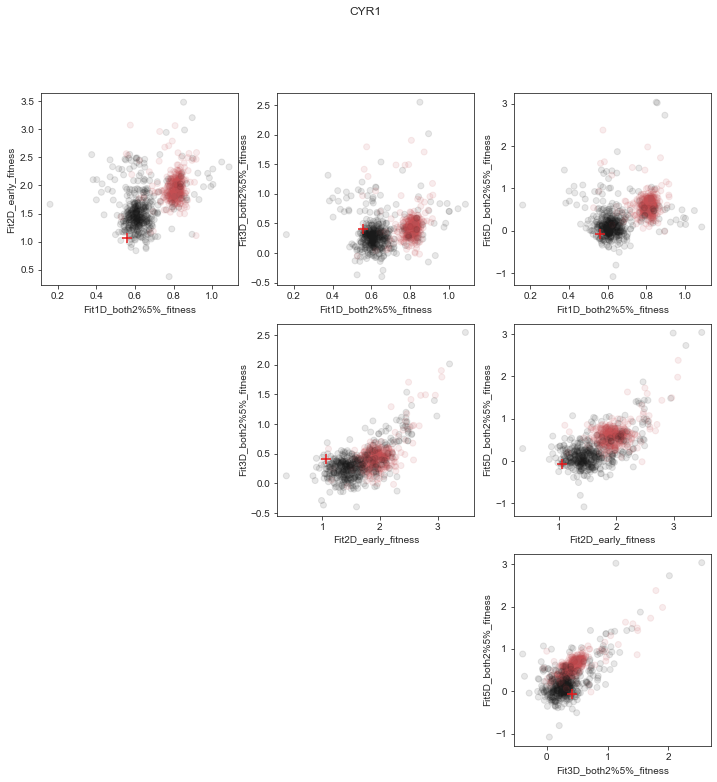

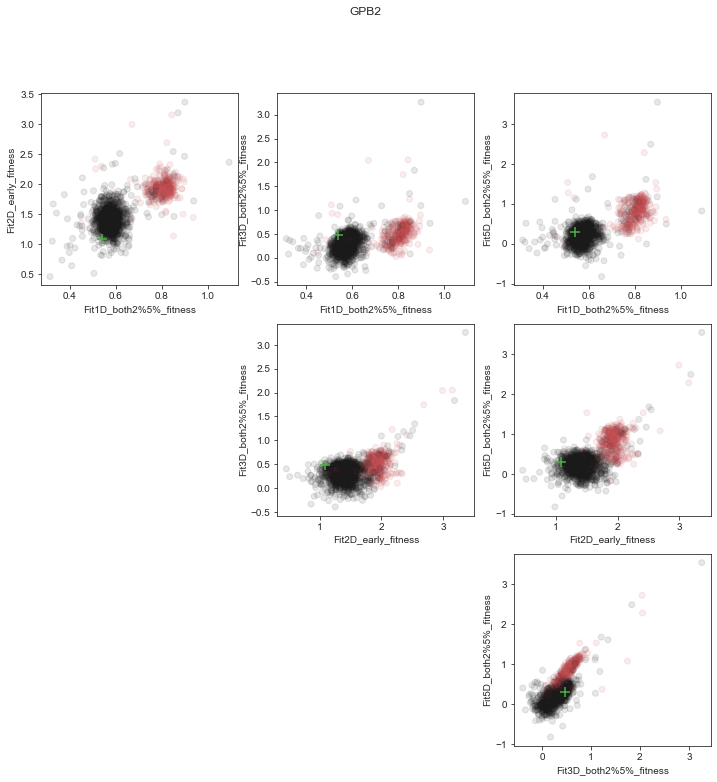

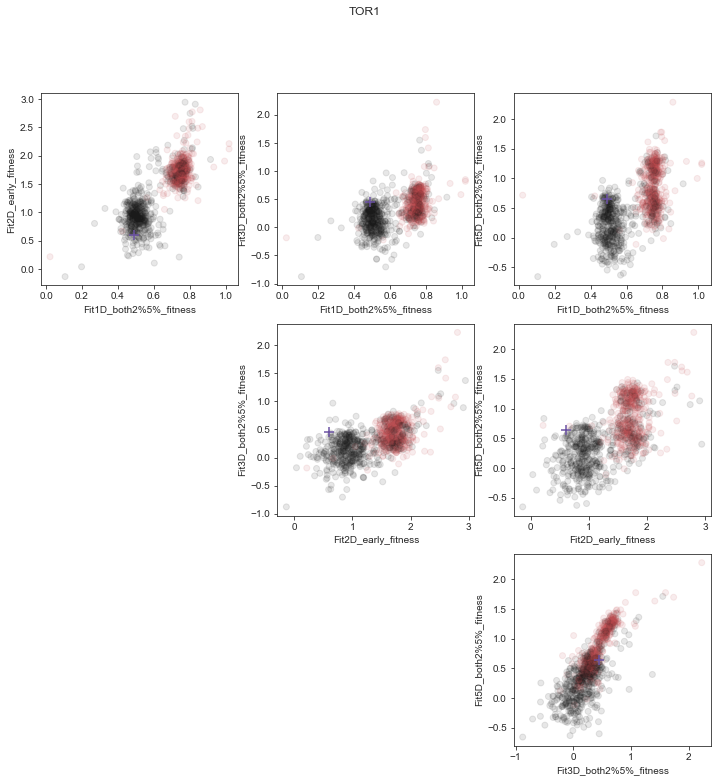

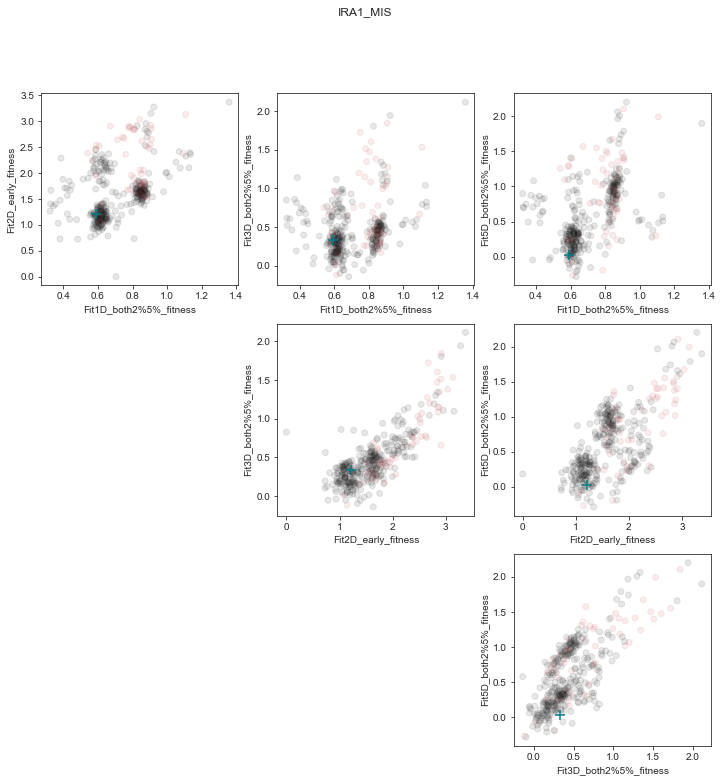

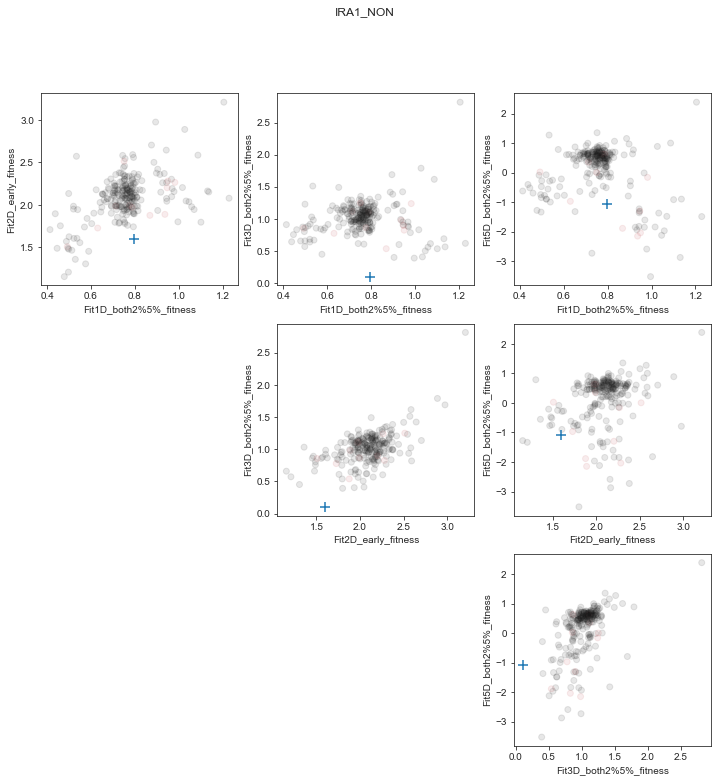

In [11]:
ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','Fit3D_both2%5%_fitness','Fit5D_both2%5%_fitness']

for a,anc in enumerate(ancestor_list):
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
#     for evo_cond in np.unique(this_anc['evolution_condition'].values):
    
    plt.figure(figsize=(4*3,4*3))
    plt.suptitle(anc)
    
    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]
    
    for x,y in combinations(range(len(conditions)),2):
        xdata = conditions[x]
        ydata = conditions[y]
        plt.subplot(3,3,3*x+y)
    
    
        colors =  ['k' if ploidy not in ['diploid','Diploid'] else 'r' for ploidy in this_anc['ploidy_new'].values]
        plt.scatter(this_anc[xdata],this_anc[ydata],color=colors,alpha=0.1)
        plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,marker='+',color=tools.anc_color_map[anc],s=100)

        plt.xlabel(xdata)
        plt.ylabel(ydata)



In [18]:
KSP1_source = ['EVO3D_IRA1_NON_R1_T21_Plate3-B4',
               'EVO3D_IRA1_NON_R1_T21_Plate3-E4',
               'EVO3D_IRA1_NON_R1_T21_Plate3-H4',
               'EVO3D_IRA1_NON_R2_T21_Plate3-B7',
               'EVO3D_IRA1_NON_R2_T21_Plate3-B8',
               'EVO3D_IRA1_NON_R2_T21_Plate3-C10',
               'EVO3D_IRA1_NON_R2_T21_Plate3-H4']

KSP1_bcs = ploidy_calls[ploidy_calls['source_well'].isin(KSP1_source)]['barcode'].values



In [19]:
# oneday_vals_inorder = merged_fitness[[x+'_fitness' for x in np.random.permutation(oneday_options)]].values
# twoday_vals_inorder = time_fitness[np.random.permutation(twoday_options)].values

# resp_ests = (twoday_order.values-oneday_order.values)/24


resp_1Day = ['Fit1D-2%-R1','Fit1D-5%-R1']
# resp_1Day = ['Fit1D-2%-R2','Fit1D-5%-R2']
resp_2Day = ['Fit2D-2%_R1_T0','Fit2D-2%_R2_T0','Fit2D-5%_R1_T0','Fit2D-5%_R2_T0']

resp_1Day_mean = tools.inverse_variance_mean(merged_fitness[[x+'_fitness' for x in resp_1Day]].values,
                                            merged_fitness[[x+'_error' for x in resp_1Day]].values)
resp_2Day_mean = tools.inverse_variance_mean(time_fitness[[x for x in resp_2Day]].values,
                                            time_fitness[[x+'_error' for x in resp_2Day]].values)


resp_ests = (resp_2Day_mean[0]-resp_1Day_mean[0])/24
resp_err = resp_2Day_mean[1]+resp_1Day_mean[1]/(24**2)

ferm_1Day = ['Fit1D-2%-R2','Fit1D-5%-R2']
# ferm_1Day = ['Fit1D-2%-R1','Fit1D-5%-R1']

ferm_1Day_mean = tools.inverse_variance_mean(merged_fitness[[x+'_fitness' for x in ferm_1Day]].values,
                                            merged_fitness[[x+'_error' for x in ferm_1Day]].values)

ferm_ests = (ferm_1Day_mean[0]-4*resp_ests)/16
ferm_err = (ferm_1Day_mean[1]+4**2*resp_err)/(16**2)


stat_ests = (merged_fitness['Fit5D_both2%5%_fitness'].values-merged_fitness['Fit3D_both2%5%_fitness'].values)/48
stat_err = (merged_fitness['Fit5D_both2%5%_error'].values+merged_fitness['Fit3D_both2%5%_error'].values)/(48**2)

merged_fitness['ResPerHour'] = resp_ests
merged_fitness['FerPerHour'] = ferm_ests
merged_fitness['StaPerHour'] = stat_ests

merged_fitness['ResPerHour_error'] = resp_err
merged_fitness['FerPerHour_error'] = ferm_err
merged_fitness['StaPerHour_error'] = stat_err

CYR1 91 12 32
GPB2 84 21 6
TOR1 65 40 22
IRA1_MIS 134 5 0
IRA1_NON 228 6 7


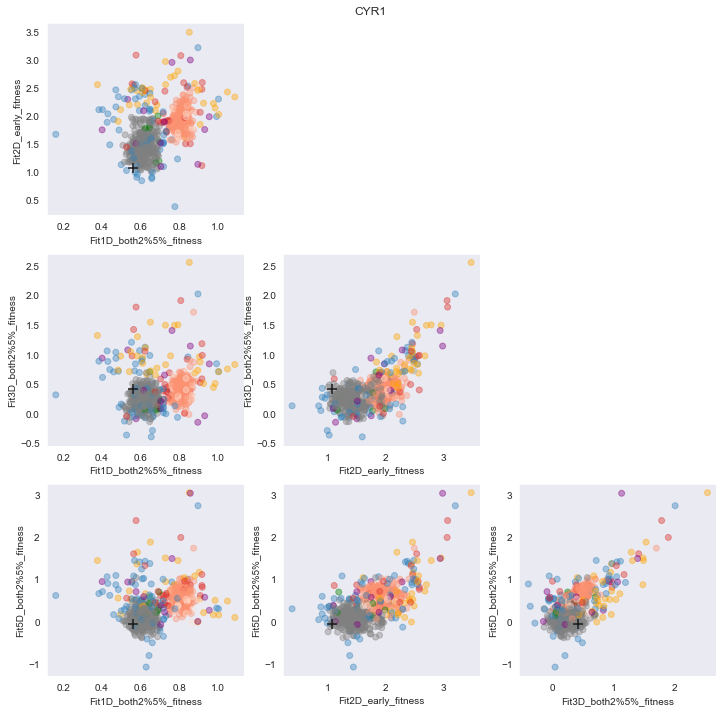

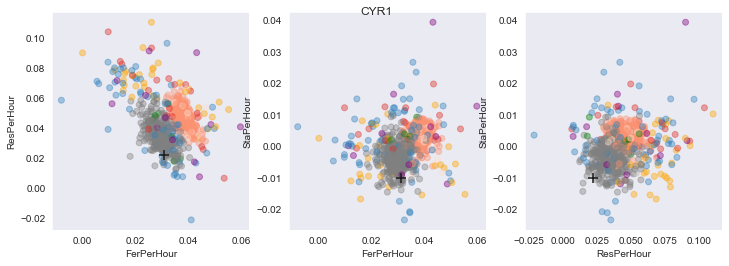

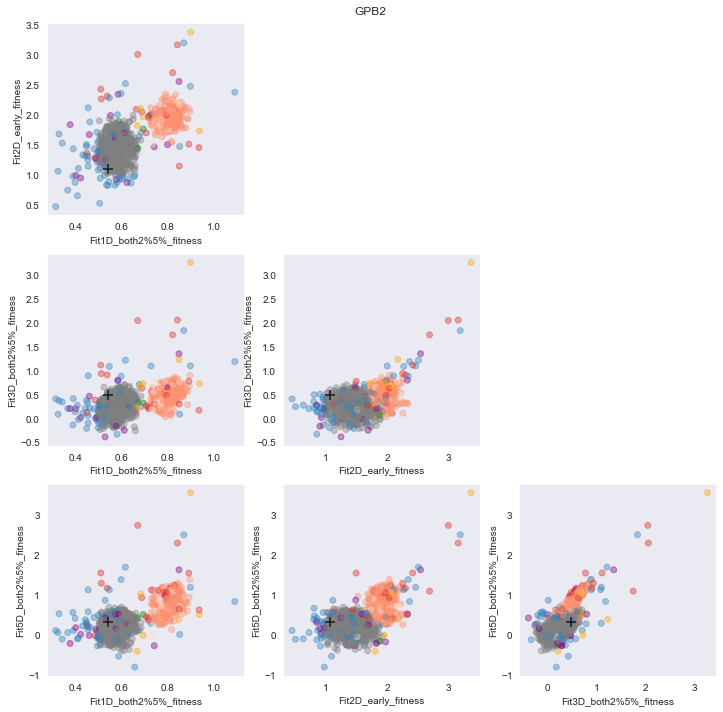

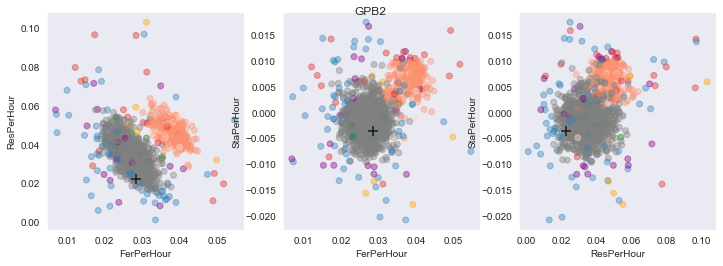

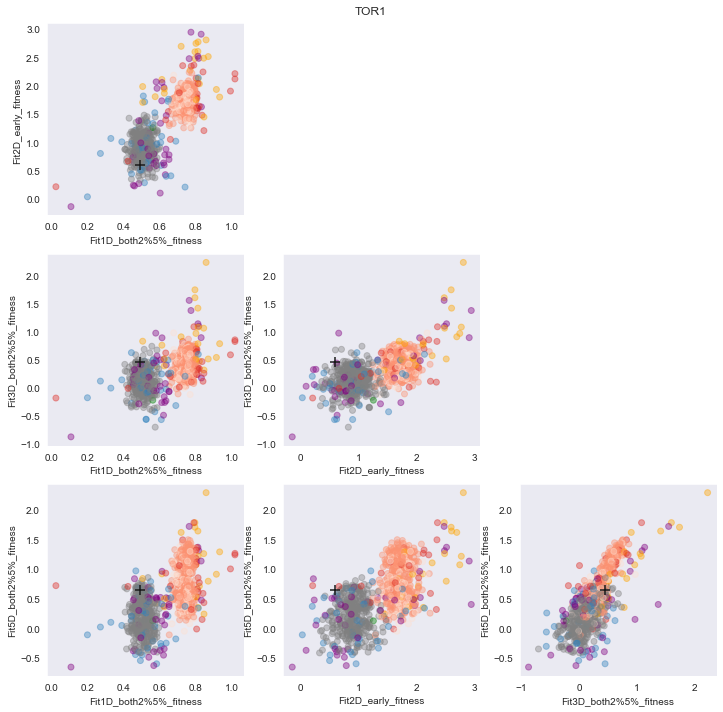

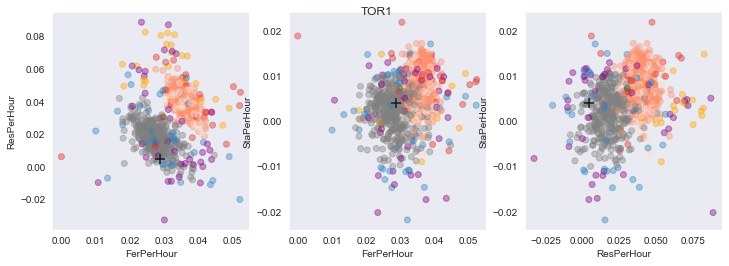

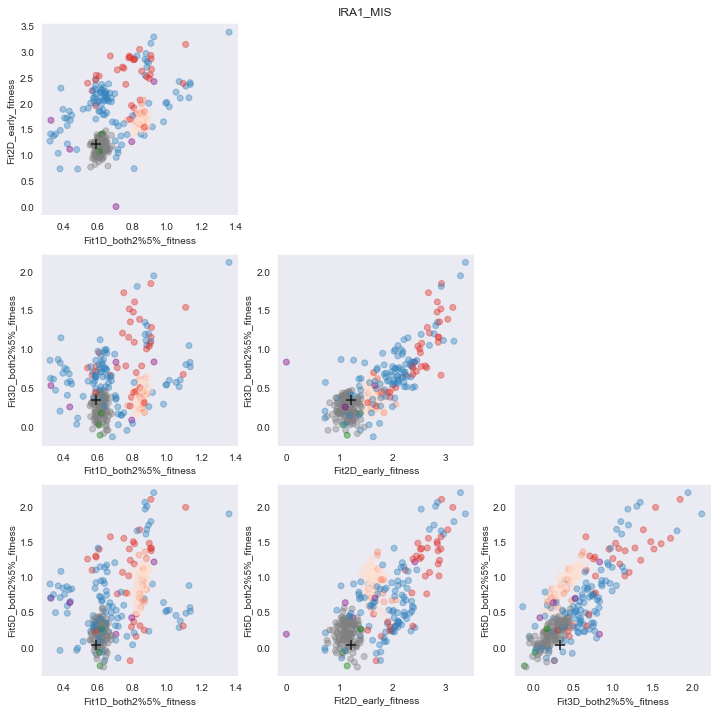

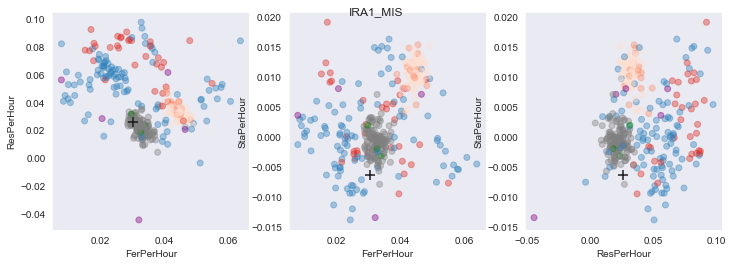

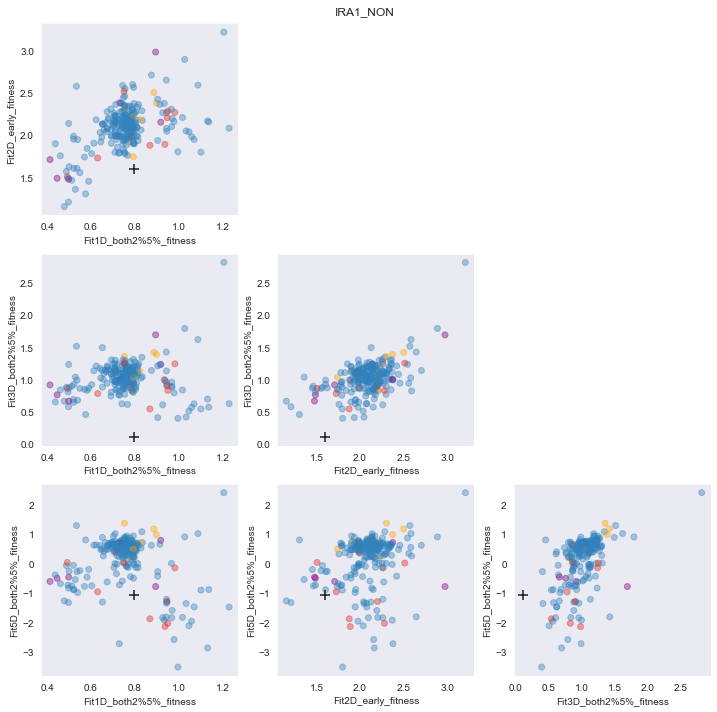

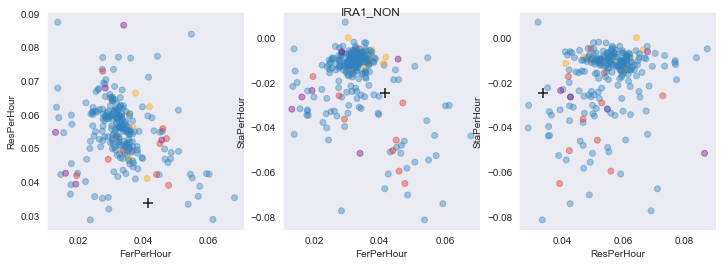

In [20]:
# Calling pure diploids and neutral haploids. According to 1 Day and 2 Day fitness (most accurate atm)
ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
# ancestor_list = ['CYR1']
calling_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','StaPerHour']
performance_calls = ['FerPerHour','ResPerHour','StaPerHour']

# calling_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','Fit3D_both2%5%_fitness','Fit5D_both2%5%_fitness']
calling_errors = [col.replace('fitness','error') for col in calling_conditions]
plotting_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','Fit3D_both2%5%_fitness','Fit5D_both2%5%_fitness']
plotting_errors = [col.replace('fitness','error') for col in plotting_conditions]

haploid_cutoffs = {'CYR1':[(0.5,0.7),(1.0,2.0),(-0.015,0.01)],
           'GPB2':[(0.5,0.7),(1.0,2.0),(-0.01,0.01)],
           'TOR1':[(0.4,0.6),(0.3,1.5),(-0.01,0.01)],
           'IRA1_MIS':[(0.55,0.7),(0.75,1.5),(-0.01,0.01)],
           'IRA1_NON':[[0.0,0.0],[0.0,0.0],(-0.015,0.01)]}

diploid_cutoffs = {'CYR1':[(0.75,0.9),(1.5,2.5),(-0.015,0.01)],
           'GPB2':[[0.72,0.9],[1.5,2.4],(-0.01,0.01)],
           'TOR1':[[0.65,0.8],[1.25,2.25],(-0.01,0.02)],
           'IRA1_MIS':[[0.75,0.9],[1.4,2.2],(0,0.016)],
           'IRA1_NON':[[0.0,0.0],[0.0,0.0],(-0.015,0.01)]}

to_sequence = {}
missing_targets = {}
already_sequenced = {}
pure_diploid_dict = {}
neutral_haploid_dict = {}

for a,anc in enumerate(ancestor_list):
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
#     for evo_cond in np.unique(this_anc['evolution_condition'].values):

    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]
    
    diploids = this_anc[this_anc['ploidy_new'].isin(['diploid','Diploid'])]
    haploids = this_anc[~this_anc['ploidy_new'].isin(['diploid','Diploid'])]
        
    diploid_avg = np.nanmean(diploids[calling_conditions],axis=0)
    diploid_25th = np.percentile(diploids[calling_conditions],25,axis=0)
    diploid_std = np.nanstd(diploids[calling_conditions],axis=0)
    
    haploid_avg = np.nanmean(haploids[calling_conditions],axis=0)
    haploid_25th = np.percentile(haploids[calling_conditions],25,axis=0)
    haploid_std = np.nanstd(haploids[calling_conditions],axis=0)


    pure_diploids = [True if np.all([x > diploid_cutoffs[anc][0][0],
                               x < diploid_cutoffs[anc][0][1],
                               y > diploid_cutoffs[anc][1][0],
                               y < diploid_cutoffs[anc][1][1],
                               z > diploid_cutoffs[anc][2][0],
                               z < diploid_cutoffs[anc][2][1]]) else False
                     for x,y,z in this_anc[calling_conditions].values]
    
    pure_diploid_dict[anc] = this_anc['barcode'].values[pure_diploids] 
    
  
    scaler = 2
    
#     pure_diploid_means = np.nanmean(this_anc[calling_conditions][pure_diploids],axis=0)
#     lower_bound = (this_anc[calling_conditions].values-scaler*np.sqrt(this_anc[calling_errors].values) < pure_diploid_means)
#     upper_bound = (pure_diploid_means < this_anc[calling_conditions].values+scaler*np.sqrt(this_anc[calling_errors].values)) 
#     pure_diploids = np.all(np.where(lower_bound & upper_bound, True, False),axis=1)

#     pure_diploid_means = np.nanmean(this_anc[plotting_conditions][pure_diploids],axis=0)
#     lower_bound = (this_anc[plotting_conditions].values-scaler*np.sqrt(this_anc[plotting_errors].values) < pure_diploid_means)
#     upper_bound = (pure_diploid_means < this_anc[plotting_conditions].values+scaler*np.sqrt(this_anc[plotting_errors].values)) 
#     pure_diploids = np.all(np.where(lower_bound & upper_bound, True, False),axis=1)



    neutral_haploids = [True if np.all([x > haploid_cutoffs[anc][0][0],
                               x < haploid_cutoffs[anc][0][1],
                               y > haploid_cutoffs[anc][1][0],
                               y < haploid_cutoffs[anc][1][1],
                               z > haploid_cutoffs[anc][2][0],
                               z < haploid_cutoffs[anc][2][1]]) else False
                     for x,y,z in this_anc[calling_conditions].values]
    
    neutral_haploid_dict[anc] = this_anc['barcode'].values[neutral_haploids] 
    
#     neutral_haploid_means = np.nanmean(this_anc[calling_conditions][neutral_haploids],axis=0)
    
#     lower_bound = (this_anc[calling_conditions].values-scaler*np.sqrt(this_anc[calling_errors].values) < neutral_haploid_means)
#     upper_bound = (neutral_haploid_means < this_anc[calling_conditions].values+scaler*np.sqrt(this_anc[calling_errors].values)) 
#     neutral_haploids = np.all(np.where(lower_bound & upper_bound, True, False),axis=1)
#     scaler = 2 

#     neutral_haploid_means = np.nanmean(this_anc[plotting_conditions][neutral_haploids],axis=0)
#     lower_bound = (this_anc[plotting_conditions].values-scaler*np.sqrt(this_anc[plotting_errors].values) < neutral_haploid_means)
#     upper_bound = (neutral_haploid_means < this_anc[plotting_conditions].values+scaler*np.sqrt(this_anc[plotting_errors].values)) 
#     neutral_haploids = np.all(np.where(lower_bound & upper_bound, True, False),axis=1)

#     print(anc,len(haploids)+len(diploids),len(haploids)+len(diploids)-np.sum(pure_diploids)-np.sum(neutral_haploids),len(diploids)-np.sum(pure_diploids),len(haploids)-np.sum(neutral_haploids))
    
    ploidys = this_anc['ploidy_new'].values
    bcs = this_anc['barcode'].values
    colors = []
    
    to_sequence[anc] = []
    missing_targets[anc] = [] 
    already_sequenced[anc] = []
    for entry in range(len(ploidys)):
        newCloneID = this_anc['cloneID_new'].values[entry]
        gene_from_previous_data = this_anc['additional_muts'].values[entry]
        
        
        
        if bcs[entry] in KSP1_bcs:
            colors.append('orange')
            already_sequenced[anc].append(bcs[entry])
            
#         elif bcs[entry] in real_targets:
#             colors.append('purple')
#             real_targets_here +=1
        
        
        elif ploidys[entry] in ['diploid','Diploid']:
            if pure_diploids[entry] == True:
                colors.append('#fc9272') # light red
            elif neutral_haploids[entry] == True:
                colors.append('green')
            else:
                if gene_from_previous_data not in ['NotSequenced',np.nan]:
                    colors.append('orange')
                    already_sequenced[anc].append(bcs[entry])
                elif not p.isnull(newCloneID):
                    colors.append('#de2d26') # dark red
                    to_sequence[anc].append(bcs[entry])
                else:
                    colors.append('purple')
                    missing_targets[anc].append(bcs[entry])
                
                
        else:
            if neutral_haploids[entry] == True:
                colors.append('gray')
            elif pure_diploids[entry] == True:
                colors.append('#fee0d2') # very light red
            else:
                if gene_from_previous_data not in ['NotSequenced',np.nan]:
                    colors.append('orange')
                    already_sequenced[anc].append(bcs[entry])
                elif not p.isnull(newCloneID):
                    colors.append('#3182bd') # dark blue
                    to_sequence[anc].append(bcs[entry])
                else:
                    colors.append('purple')
                    missing_targets[anc].append(bcs[entry])
                
    
    plt.figure(figsize=(12,12))
    plt.suptitle(anc,y=0.9)       
        
    print(anc,len(to_sequence[anc]),len(missing_targets[anc]),len(already_sequenced[anc]))
    counter = 0
    for c1,c2 in combinations(plotting_conditions,2):
        c1_loc = np.where(np.isin(plotting_conditions,c1))[0][0]
        c2_loc = np.where(np.isin(plotting_conditions,c2))[0][0]
#         print(c1_loc+(c2_loc)*3+1)
        plt.subplot(3,3,c1_loc+(c2_loc-1)*3+1)
        plt.scatter(this_anc[c1],this_anc[c2],color=colors,alpha=0.4)
        plt.xlabel(c1)
        plt.ylabel(c2)
        counter+=1
        plt.scatter(background_mutant[c1].values,background_mutant[c2].values,marker='+',color='k',s=100)

    plt.savefig(f'plots/WGS_targets_{anc}.pdf',bbox_inches='tight')
    
    plt.figure(figsize=(12,4))
    plt.suptitle(anc,y=0.9)       
        
#     print(anc,len(to_sequence[anc]),len(missing_targets[anc]),len(already_sequenced[anc]))
    counter = 0
#     actually_plot
    for c1,c2 in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
#         c1_loc = np.where(np.isin(plotting_conditions,c1))[0][0]
#         c2_loc = np.where(np.isin(plotting_conditions,c2))[0][0]
#         print(c1_loc+(c2_loc)*3+1)
        plt.subplot(1,3,counter+1)
        plt.scatter(this_anc[c1],this_anc[c2],color=colors,alpha=0.4)
        plt.xlabel(c1)
        plt.ylabel(c2)
        counter+=1
        plt.scatter(background_mutant[c1].values,background_mutant[c2].values,marker='+',color='k',s=100)

    plt.savefig(f'plots/WGS_targets_{anc}_performance.pdf',bbox_inches='tight')




In [21]:
np.random.seed(9)
n_neutrals = 5
n_pure_diploids = 5

neutrals_to_seq = {}
diploids_to_seq = {}

### add in random neutrals and diploids 
for anc in ancestor_list:
    if anc != 'IRA1_NON':
        neutrals_sequenceable = [bc  for bc in neutral_haploid_dict[anc] if not p.isnull(merged_fitness[merged_fitness['barcode']==bc]['cloneID_new'].values[0])]
        diploids_sequenceable = [bc  for bc in pure_diploid_dict[anc] if not p.isnull(merged_fitness[merged_fitness['barcode']==bc]['cloneID_new'].values[0])]

    
        neutrals_to_seq[anc] = np.random.choice(neutrals_sequenceable,n_neutrals)
        diploids_to_seq[anc] = np.random.choice(diploids_sequenceable,n_pure_diploids)
        to_sequence[anc] += list(neutrals_to_seq[anc])
        to_sequence[anc] += list(diploids_to_seq[anc])

### 

In [22]:
### downsample big IRA1_NON cluster
anc = 'IRA1_NON'

ira1_non_cluster_picks = 20

ira1_non_cluster_cutoff = [(0.7,0.85),(1.75,2.45),(-0.02,0.0)]

this_anc = merged_fitness[merged_fitness['ancestor']==anc]
able_to_sequence = this_anc[this_anc['barcode'].isin(to_sequence['IRA1_NON'])]

ira1_cluster = [True if np.all([x > ira1_non_cluster_cutoff[0][0],
                           x < ira1_non_cluster_cutoff[0][1],
                           y > ira1_non_cluster_cutoff[1][0],
                           y < ira1_non_cluster_cutoff[1][1],
                           z > ira1_non_cluster_cutoff[2][0],
                           z < ira1_non_cluster_cutoff[2][1]]) else False
                 for x,y,z in able_to_sequence[calling_conditions].values]

cluster_picks = np.random.choice(able_to_sequence['barcode'].values[ira1_cluster],ira1_non_cluster_picks)

others = able_to_sequence['barcode'].values[[not entry for entry in ira1_cluster]]

to_sequence['IRA1_NON'] = list(others)+list(cluster_picks)

In [390]:
### downsample big IRA1_NON cluster
# anc = 'IRA1_MIS'

# ira1_mis_cluster_picks = 20

# ira1_mis_cluster_cutoff = [(0.7,0.85),(1.75,2.45),(-0.02,0.0)]

# this_anc = merged_fitness[merged_fitness['ancestor']==anc]
# able_to_sequence = this_anc[this_anc['barcode'].isin(to_sequence['IRA1_NON'])]

# ira1_mis_cluster = [True if np.all([x > ira1_cluster_cutoff[0][0],
#                            x < ira1_cluster_cutoff[0][1],
#                            y > ira1_cluster_cutoff[1][0],
#                            y < ira1_cluster_cutoff[1][1],
#                            z > ira1_cluster_cutoff[2][0],
#                            z < ira1_cluster_cutoff[2][1]]) else False
#                  for x,y,z in able_to_sequence[calling_conditions].values]

# cluster_picks = np.random.choice(able_to_sequence['barcode'].values[ira1_mis_cluster],ira1_mis_cluster_picks)

# others = able_to_sequence['barcode'].values[[not entry for entry in ira1_mis_cluster]]

# to_sequence['IRA1_MIS'] = list(others)+list(cluster_picks)

In [17]:
to_sequence_all = []
for a,anc in enumerate(ancestor_list):
    to_sequence_all += to_sequence[anc]

In [18]:
to_sequence_df = merged_fitness[merged_fitness['barcode'].isin(to_sequence_all)]

new_clones_to_sequence = to_sequence_df[(p.isnull(to_sequence_df['gene']))][['barcode','cloneID_new']]

new_clones_known_loc = new_clones_to_sequence[~p.isnull(new_clones_to_sequence[('cloneID_new')])]
real_targets = new_clones_known_loc['barcode'].values

In [429]:
anc_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
for anc in anc_list:
    print(anc,len(to_sequence[anc]))
    this_anc = merged_fitness[merged_fitness['barcode'].isin(to_sequence[anc])]

    not_found_ix = p.isnull(this_anc['cloneID_new'])
    found_ix = ~p.isnull(this_anc['cloneID_new'])
    np.mean(this_anc[not_found_ix]['Fit1D-2%-T0'])
    np.mean(this_anc[found_ix]['Fit1D-2%-T0'])

    print('Found!','\t',np.unique(this_anc[found_ix]['source_publication'],return_counts=True))
    print('Not Found','\t',np.unique(this_anc[not_found_ix]['source_publication'],return_counts=True))

CYR1 101
Found! 	 (array(['Aggeli2020', 'This_study'], dtype=object), array([65, 36]))
Not Found 	 (array([], dtype=object), array([], dtype=int64))
GPB2 94
Found! 	 (array(['Aggeli2020', 'This_study'], dtype=object), array([71, 23]))
Not Found 	 (array([], dtype=object), array([], dtype=int64))
TOR1 75
Found! 	 (array(['Aggeli2020', 'This_study'], dtype=object), array([54, 21]))
Not Found 	 (array([], dtype=object), array([], dtype=int64))
IRA1_MIS 144
Found! 	 (array(['This_study'], dtype=object), array([144]))
Not Found 	 (array([], dtype=object), array([], dtype=int64))
IRA1_NON 123
Found! 	 (array(['This_study'], dtype=object), array([122]))
Not Found 	 (array([], dtype=object), array([], dtype=int64))


In [430]:
this_anc = merged_fitness[merged_fitness['barcode'].isin(to_sequence['GPB2'])]

CYR1 101 12 64
GPB2 94 21 12
TOR1 75 40 44
IRA1_MIS 144 5 0
IRA1_NON 123 6 14


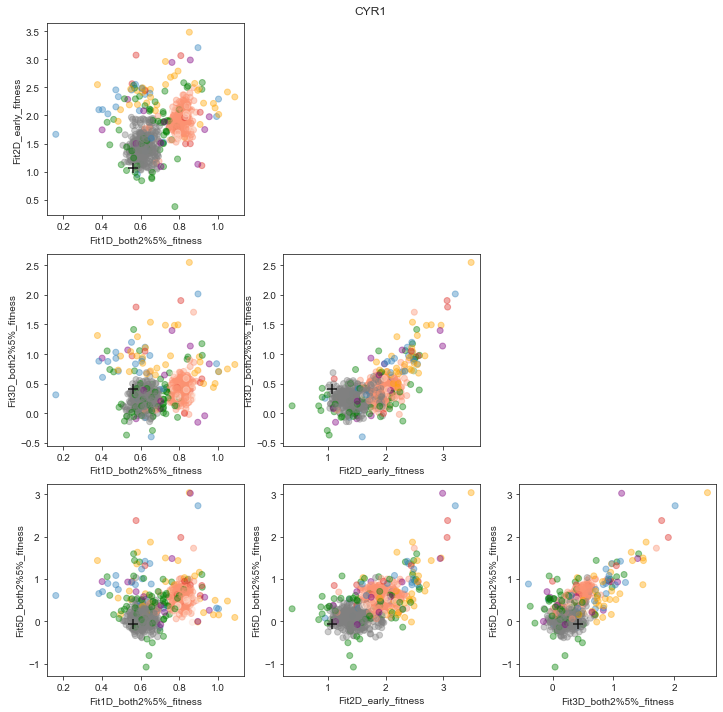

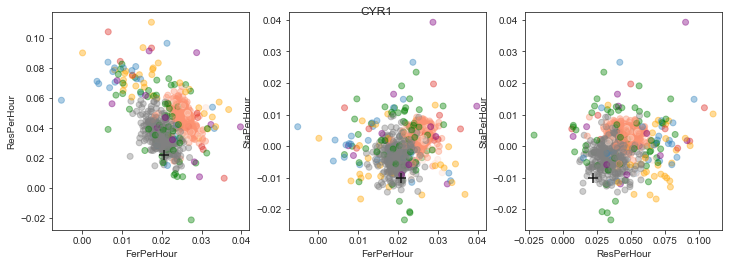

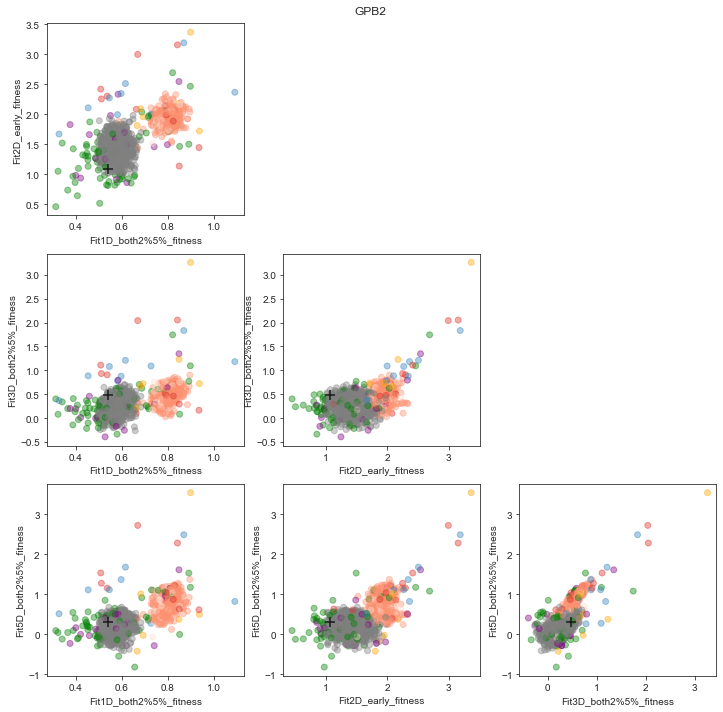

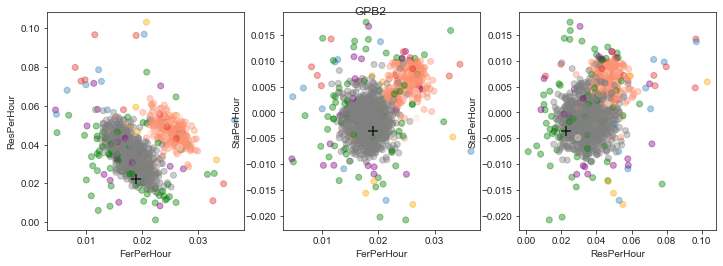

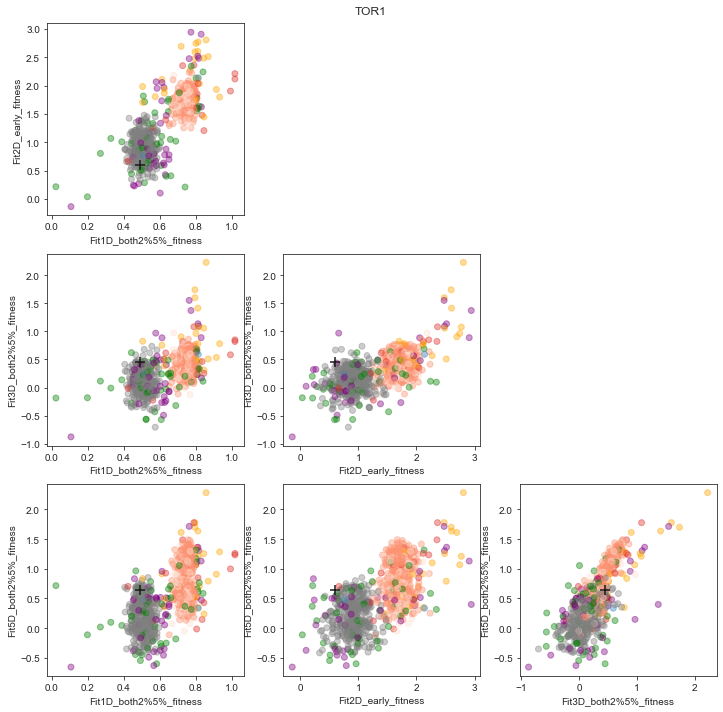

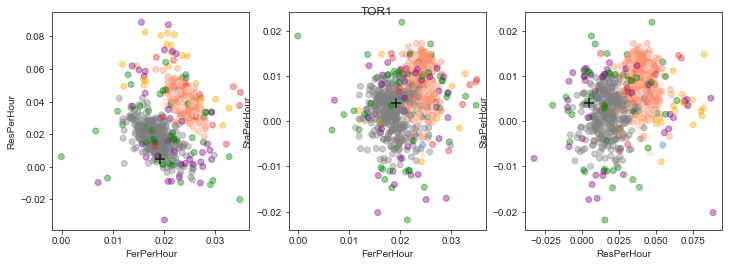

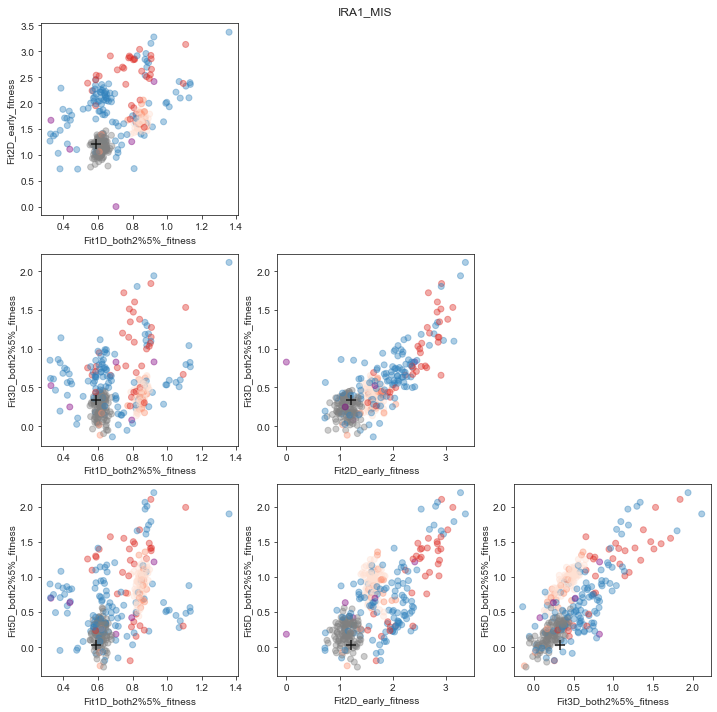

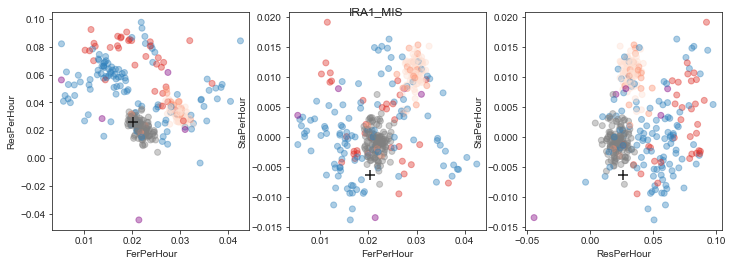

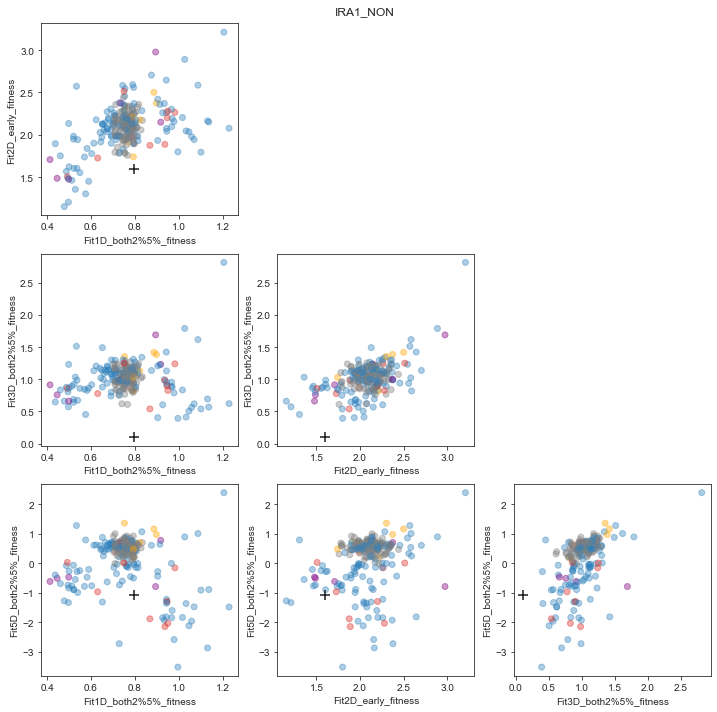

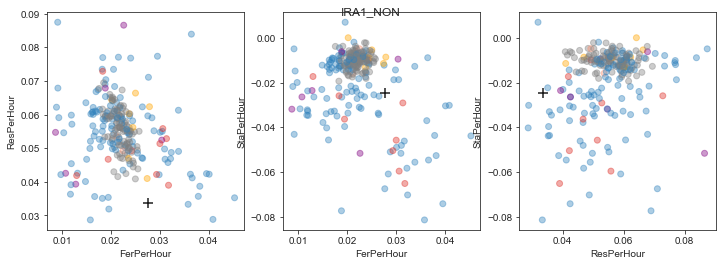

In [431]:
# Calling pure diploids and neutral haploids. According to 1 Day and 2 Day fitness (most accurate atm)
ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
# ancestor_list = ['CYR1']
calling_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','StaPerHour']
# calling_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','Fit3D_both2%5%_fitness','Fit5D_both2%5%_fitness']
calling_errors = [col.replace('fitness','error') for col in calling_conditions]
plotting_conditions = ['Fit1D_both2%5%_fitness','Fit2D_early_fitness','Fit3D_both2%5%_fitness','Fit5D_both2%5%_fitness']
plotting_errors = [col.replace('fitness','error') for col in plotting_conditions]

for a,anc in enumerate(ancestor_list):
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
#     for evo_cond in np.unique(this_anc['evolution_condition'].values):

    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

    ploidys = this_anc['ploidy_new'].values
    bcs = this_anc['barcode'].values
    sources = this_anc['source_publication'].values
    color_list = []
    
    for entry in range(len(ploidys)):
        newCloneID = this_anc['cloneID_new'].values[entry]
        gene_from_previous_data = this_anc['gene'].values[entry]  
        
        if bcs[entry] in already_sequenced[anc]:
            color_list.append('orange')
            already_sequenced[anc].append(bcs[entry])

        elif ploidys[entry] in ['diploid','Diploid']:
            if bcs[entry] in to_sequence[anc]:
                if sources[entry] in ['This_study']:
                    color_list.append('#de2d26') # dark red
                else:
                    color_list.append('green') # dark red
            else:
                color_list.append('#fc9272') # light red
                
        else:
            if bcs[entry] in to_sequence[anc]:
                if sources[entry] in ['This_study']:
                    color_list.append('#3182bd') # dark blue
                else:
                    color_list.append('green') # dark red
            elif bcs[entry] in neutral_haploid_dict[anc]:
                color_list.append('gray')
            elif bcs[entry] in pure_diploid_dict[anc]:
                color_list.append('#fee0d2') # very light red
            elif bcs[entry] in missing_targets[anc]:
                color_list.append('purple')
            else:
                color_list.append('gray')

                
    
    plt.figure(figsize=(12,12))
    plt.suptitle(anc,y=0.9)       
        
    print(anc,len(to_sequence[anc]),len(missing_targets[anc]),len(already_sequenced[anc]))
    counter = 0
    for c1,c2 in combinations(plotting_conditions,2):
        c1_loc = np.where(np.isin(plotting_conditions,c1))[0][0]
        c2_loc = np.where(np.isin(plotting_conditions,c2))[0][0]
#         print(c1_loc+(c2_loc)*3+1)
        plt.subplot(3,3,c1_loc+(c2_loc-1)*3+1)
        plt.scatter(this_anc[c1],this_anc[c2],color=color_list,alpha=0.4)
        plt.xlabel(c1)
        plt.ylabel(c2)
        counter+=1
        plt.scatter(background_mutant[c1].values,background_mutant[c2].values,marker='+',color='k',s=100)

    plt.savefig(f'plots/WGS_targets_{anc}_final.pdf',bbox_inches='tight')
    
    plt.figure(figsize=(12,4))
    plt.suptitle(anc,y=0.9)       
        
#     print(anc,len(to_sequence[anc]),len(missing_targets[anc]),len(already_sequenced[anc]))
    counter = 0
#     actually_plot
    for c1,c2 in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
#         c1_loc = np.where(np.isin(plotting_conditions,c1))[0][0]
#         c2_loc = np.where(np.isin(plotting_conditions,c2))[0][0]
#         print(c1_loc+(c2_loc)*3+1)
        plt.subplot(1,3,counter+1)
        plt.scatter(this_anc[c1],this_anc[c2],color=color_list,alpha=0.4)
        plt.xlabel(c1)
        plt.ylabel(c2)
        counter+=1
        plt.scatter(background_mutant[c1].values,background_mutant[c2].values,marker='+',color='k',s=100)

    plt.savefig(f'plots/WGS_targets_{anc}_final_performance.pdf',bbox_inches='tight')

In [412]:
merged_fitness[(merged_fitness['ancestor']=='CYR1') & (merged_fitness['Fit3D_both2%5%_fitness']>2.2)].values

array([[0.0340997415330522, 0.93422164525941, 0.0348512763518259,
        0.8617602017565549, 0.0246702768715567, 0.7777046716268671,
        0.0247496719734246, 0.8587021181773341, 0.0245929254796753,
        1.7180510567153269, 0.0246737947124922, 1.6547961204571633,
        0.0339961278621712, 1.550424127088259, 0.0340349316331249,
        1.629958296040542, 0.0642963118424075, 3.10239910001813,
        0.0754896797162371, 3.63325444137176, 0.1024220472272083,
        2.253347679952451, 0.1733748358438138, 3.162260201721555,
        0.086695339952778, 1.1997012810278609, 0.089774498497508,
        1.817880216152928, 0.1428034797873267, 4.037519260095748,
        0.164304150015292, 3.974280469886924, 0.1349591568232586,
        4.36897494237231, 0.1642759555168561, 3.4346470275773378,
        0.0495756938606386, 1.667268872839276, 0.1332777077862828,
        3.378277541351328, 19, 5853, 10394, 51593, 13842, 100735, 34798,
        71036, 11297, 11801, 195639, 65677, 235296, 12136, 114

In [420]:
list(merged_fitness[merged_fitness['source_publication']=='Aggeli2020'][['gene','type','additional_muts']].values)

[array([nan, 'Other',
        'DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOUS_CODING; YDL180W-DOWNSTREAM; LAS21-UPSTREAM'],
       dtype=object),
 array([nan, 'Other', 'DOP1-DOP1; SMD2-SMD2; YDL180W-YDL180W; LAS21-LAS21'],
       dtype=object),
 array([nan, 'Other',
        'DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOUS_CODING; YDL180W-DOWNSTREAM; LAS21-UPSTREAM'],
       dtype=object),
 array(['PBS2', 'NON_SYNONYMOUS_CODING',
        'DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOUS_CODING; YDL180W-DOWNSTREAM; LAS21-UPSTREAM'],
       dtype=object),
 array(['GSH1', 'NON_SYNONYMOUS_CODING',
        'DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOUS_CODING; YDL180W-DOWNSTREAM; LAS21-UPSTREAM'],
       dtype=object),
 array(['SSK2', 'FRAME_SHIFT',
        'DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOUS_CODING; YDL180W-DOWNSTREAM; LAS21-UPSTREAM'],
       dtype=object),
 array([nan, nan, 'NotSequenced'], dtype=object),
 array([nan, nan, 'NotSequenced'], dtype=object),
 array([nan, nan, '

In [397]:
# source_plates = ['plate1','plate2','plate3','plate4']

3


# plate_order = {'CYR1':['cyr1_evo1_plate1','cyr1_evo1_plate2','cyr1_evo1_plate3',
#                        'cyr1_evo1_plate4','cyr1_evo1_plate5','cyr1_evo1_plate6','cyr1_evo1_plate7',
#                        'cyr1_evo1_plate8','cyr1_evo1_plate9','cyr1_evo1_plate10'],
#               'GPB2':['gpb2_evo1_plate1','gpb2_evo1_plate2','gpb2_evo1_plate3',
#                       'gpb2_evo1_plate4','gpb2_evo1_plate5','gpb2_evo1_plate6','gpb2_evo1_plate7',
#                       'gpb2_evo1_plate8','gpb2_evo1_plate9','gpb2_evo1_plate10',
#                       'gpb2_evo2_plate1','gpb2_evo2_plate2','gpb2_evo2_plate3',
#                       'gpb2_evo2_plate4','gpb2_evo2_plate5','gpb2_evo2_plate6','gpb2_evo2_plate7',
#                       'gpb2_evo2_plate8','gpb2_evo2_plate9','gpb2_evo2_plate10'],
#               'TOR1':['tor1_evo1_plate1','tor1_evo1_plate2','tor1_evo1_plate3',
#                        'tor1_evo1_plate4','tor1_evo1_plate5','tor1_evo1_plate6','tor1_evo1_plate7',
#                        'tor1_evo1_plate8','tor1_evo1_plate9','tor1_evo1_plate10']}

In [342]:
def draw_plate(ax,pick_me,destinations,plate):
    plt.title(plate)

    plt.pcolormesh(np.asarray(pick_me).reshape(8,12),cmap='Blues',vmin=0,vmax=3)
#     plt.colorbar()

#     called = np.asarray(called).reshape(8,12)

#     plate_ratio[plate] = np.sum(called)
    counter = 0
    for y in range(8):
        for x in range(12):
            if pick_me[y,x] == True:
#                 plt.scatter(x+0.5,y+0.5,marker='x',color='k',s=100)  
                plt.text(x+0.5,y+0.5,color='k',s=f'{destinations[counter]}',size=10,ha='center',va='center')
                counter +=1 


    plt.xticks([i+0.5 for i in range(12)],[i+1 for i in range(12)])
    plt.yticks([i+0.5 for i in range(8)],[chr(65+i) for i in range(8)])
    plt.gca().invert_yaxis()

    for i in range(12):
        plt.axvline(i,color='gray')
    for i in range(8):
        plt.axhline(i,color='gray')

    plt.xlim(0,12)
    plt.ylim(8,0)

In [382]:
this_set['cloneID_new'].values

array(['tor1_evo1_plate8_E5', 'tor1_evo1_plate8_D4',
       'tor1_evo1_plate1_B4', 'tor1_evo1_plate3_F3',
       'tor1_evo1_plate1_C5', 'tor1_evo1_plate10_B3',
       'tor1_evo1_plate9_D2', 'tor1_evo1_plate1_G5',
       'tor1_evo1_plate5_C4', 'tor1_evo1_plate2_G12',
       'tor1_evo1_plate5_B6', 'tor1_evo1_plate7_D7',
       'tor1_evo1_plate10_E2', 'tor1_evo1_plate1_B3',
       'tor1_evo1_plate7_A5', 'tor1_evo1_plate7_D2',
       'tor1_evo1_plate1_G11', 'tor1_evo1_plate10_E8',
       'tor1_evo1_plate8_C11', 'tor1_evo1_plate10_F11', nan,
       'tor1_evo1_plate1_A1', 'tor1_evo1_plate7_G6',
       'tor1_evo1_plate8_E3', 'tor1_evo1_plate7_C11',
       'tor1_evo1_plate3_E9', 'tor1_evo1_plate8_G2',
       'tor1_evo1_plate10_E7', 'tor1_evo1_plate7_G3',
       'tor1_evo1_plate5_B2', 'tor1_evo1_plate8_C5',
       'tor1_evo1_plate4_E7', 'tor1_evo1_plate2_F3',
       'tor1_evo1_plate5_B9', 'tor1_evo1_plate1_A6',
       'tor1_evo1_plate3_G9', 'tor1_evo1_plate8_C8',
       'tor1_evo1_plate4_C4', '

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['plate'] = plate_names
/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['well'] = well_names


['cyr1_evo1_plate1' 'cyr1_evo1_plate10' 'cyr1_evo1_plate2'
 'cyr1_evo1_plate3' 'cyr1_evo1_plate4' 'cyr1_evo1_plate5'
 'cyr1_evo1_plate6' 'cyr1_evo1_plate7' 'cyr1_evo1_plate8'
 'cyr1_evo1_plate9']
here!! cyr1_evo1_plate1-B10 AGAACAAAAACTAAACTCATTCATGG_GTCGGAACGCGTAAGGTCGTTGCCAG
here!! cyr1_evo1_plate1-C4 GACAGAAAAGCCAAATGGATTTACCG_TCTTTAATGTAAAACTTCTTTTAGGT
here!! cyr1_evo1_plate1-D6 GACAGAAAAGCCAAATGGATTTACCG_CCCAGAAATTTAAATTTGCTTAACAC
here!! cyr1_evo1_plate2-A7 CTAGAAATCTCAAAAACTTTTGGCTG_TTCTGAACGCATAATCAAGTTTCAAA
here!! cyr1_evo1_plate2-B2 GACAGAAAAGCCAAATGGATTTACCG_GTTATAACACCTAAATAGCTTGGATG
here!! cyr1_evo1_plate2-C6 AGAACAAAAACTAAACTCATTCATGG_ATCTAAAAAATCAACTTGATTCACGA
here!! cyr1_evo1_plate2-D3 GACAGAAAAGCCAAATGGATTTACCG_AGAACAAAATACAACGAATTTTCATA
here!! cyr1_evo1_plate2-G2 CTAGAAATCTCAAAAACTTTTGGCTG_AAAAGAAAGATGAAAAAAATTCTAGT
here!! cyr1_evo1_plate2-H2 ACTTAAAAAGCAAACATGATTATTCA_GATCAAAATAGCAACTTTCTTCTTTT
here!! cyr1_evo1_plate3-A1 GACAGAAAAGCCAAATGGATTTACCG_TAGAAAACAAAGAATCTCCT

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['plate'] = plate_names
/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['well'] = well_names


['gpb2_evo1_plate1' 'gpb2_evo1_plate10' 'gpb2_evo1_plate2'
 'gpb2_evo1_plate3' 'gpb2_evo1_plate4' 'gpb2_evo1_plate5'
 'gpb2_evo1_plate6' 'gpb2_evo1_plate7' 'gpb2_evo1_plate8'
 'gpb2_evo1_plate9' 'gpb2_evo2_plate1' 'gpb2_evo2_plate10'
 'gpb2_evo2_plate2' 'gpb2_evo2_plate3' 'gpb2_evo2_plate4'
 'gpb2_evo2_plate6' 'gpb2_evo2_plate7' 'gpb2_evo2_plate8'
 'gpb2_evo2_plate9']
here!! gpb2_evo1_plate1-C3 CCGCCAATCCCGAACCCCGTTTCGCC_GCGAGAACGCGGAAGGGAGTTAGGCT
here!! gpb2_evo1_plate1-C5 CCGCCAATCCCGAACCCCGTTTCGCC_AACCAAATTAAGAAGAGGCTTTCTAC
here!! gpb2_evo1_plate1-D7 CCAACAAAAGGAAACGTATTTATTGA_ACCCTAATACTTAAACTCTTTCACGG
here!! gpb2_evo1_plate1-E10 CCGCCAATCCCGAACCCCGTTTCGCC_GAATAAATCGGGAAGGGGGTTTTGGG
here!! gpb2_evo1_plate1-G2 CCGCCAATCCCGAACCCCGTTTCGCC_TCTGCAAGGCTCAATAGGGTTGGTTT
here!! gpb2_evo1_plate1-H8 GTATTAAAATTAAAAATAATTGCACA_TGATAAAGAAGGAACATATTTCAGAT
here!! gpb2_evo1_plate2-H2 CCGCCAATCCCGAACCCCGTTTCGCC_AGACGAATTTCGAACAGGATTTTCCT
here!! gpb2_evo1_plate3-E7 CCAACAAAAGGAAACGTATTTATTGA_AGCGCAA

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['plate'] = plate_names
/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/1974334561.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['well'] = well_names


['tor1_evo1_plate1' 'tor1_evo1_plate10' 'tor1_evo1_plate2'
 'tor1_evo1_plate3' 'tor1_evo1_plate4' 'tor1_evo1_plate5'
 'tor1_evo1_plate6' 'tor1_evo1_plate7' 'tor1_evo1_plate8'
 'tor1_evo1_plate9']
here!! tor1_evo1_plate1-A1 ATCAGAAGTTCGAATCAAATTACGAA_ATATGAAGGTACAATATAGTTTTTTT
here!! tor1_evo1_plate1-A6 ATCAGAAGTTCGAATCAAATTACGAA_ACAAAAAGTTCGAATCTTTTTTATTC
here!! tor1_evo1_plate1-B3 TTAAAAATACAAAAAAAGATTTAAGG_TAGACAAATGATAAGGTGCTTTAGGG
here!! tor1_evo1_plate1-B4 TTAAAAATACAAAAAAAGATTTAAGG_ACGCGAAGGAGTAATGTTCTTTAGTA
here!! tor1_evo1_plate1-C4 TTAAAAATACAAAAAAAGATTTAAGG_ATGTGAAAAGAAAACCCCCTTAGGAT
here!! tor1_evo1_plate1-C11 TTAAAAATACAAAAAAAGATTTAAGG_CACTTAATCTTTAAAGTAATTCCCCG
here!! tor1_evo1_plate1-D9 ATCAGAAGTTCGAATCAAATTACGAA_GCGCAAAGACTTAAGTATTTTCAATG
here!! tor1_evo1_plate1-E2 ATCAGAAGTTCGAATCAAATTACGAA_TTCTCAATAACCAATGAAATTATTTT
here!! tor1_evo1_plate1-E8 TTAAAAATACAAAAAAAGATTTAAGG_CACATAAAATTAAATTTAGTTTTTAC
here!! tor1_evo1_plate1-G5 ATCAGAAGTTCGAATCAAATTACGAA_TCTTAAATAGTTAATTCGGT

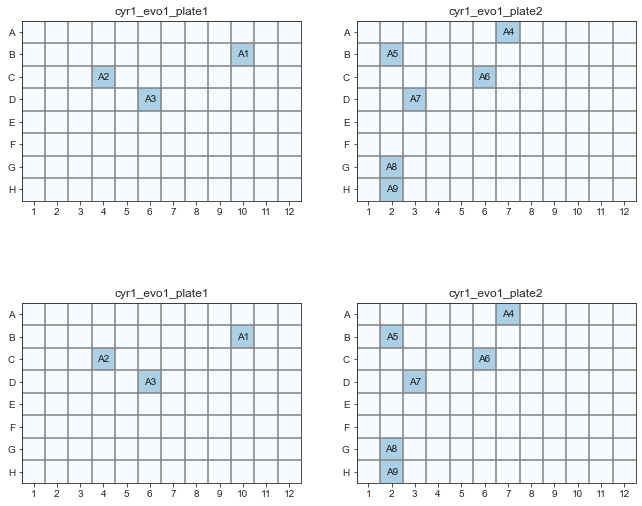

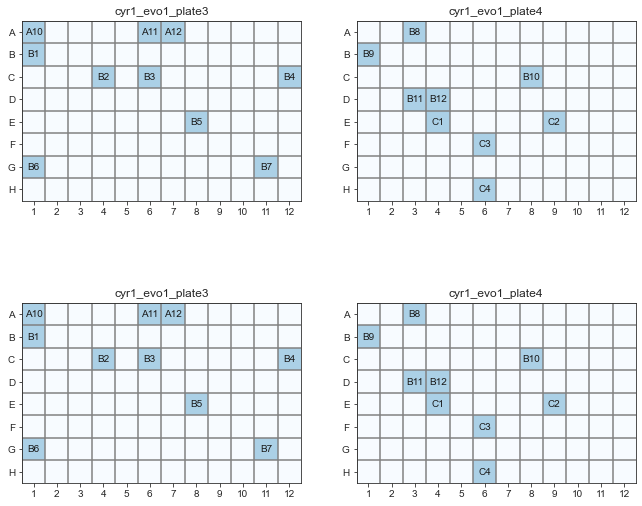

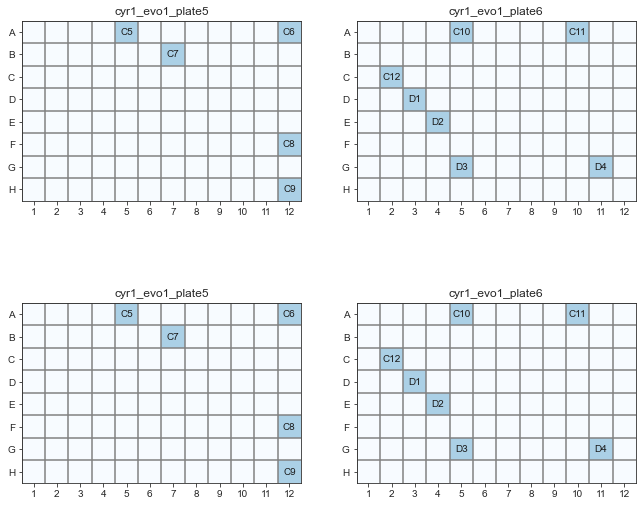

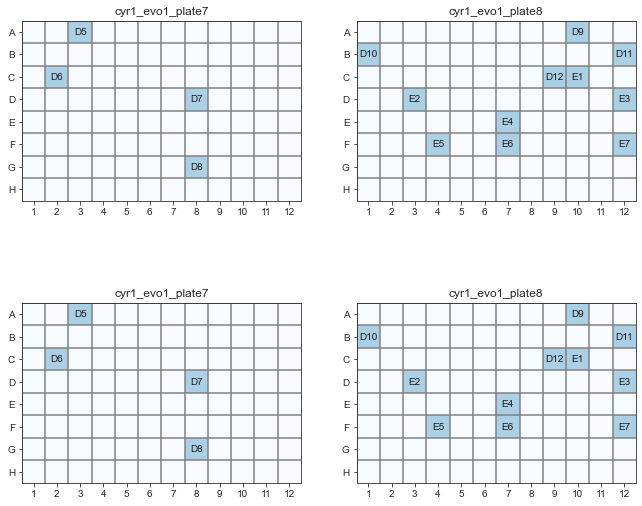

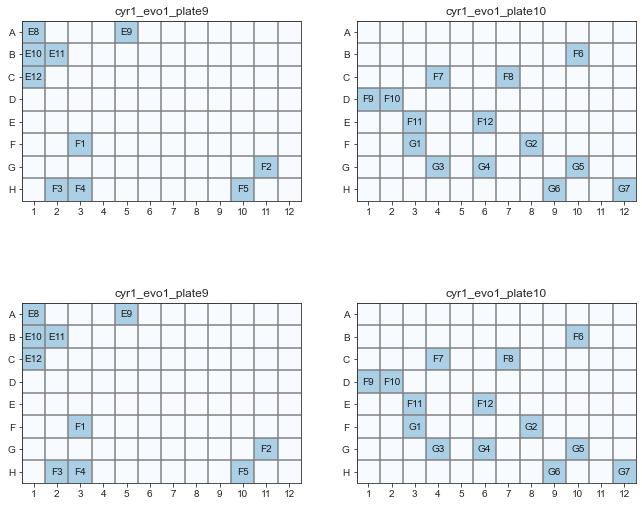

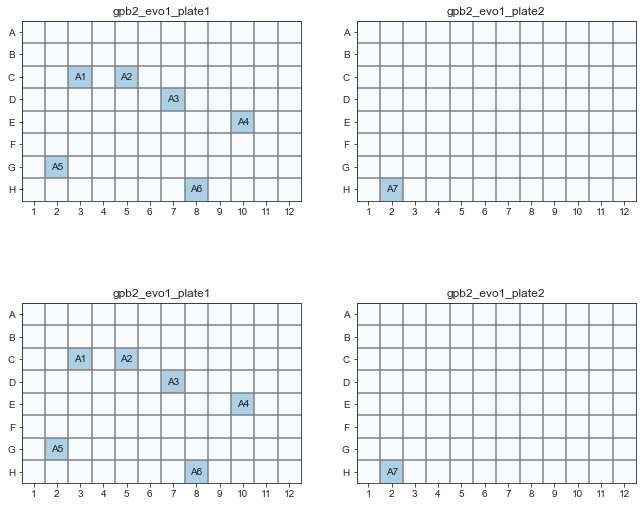

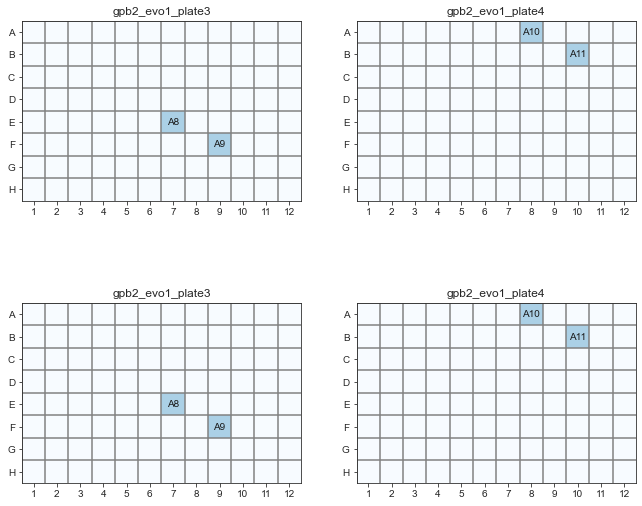

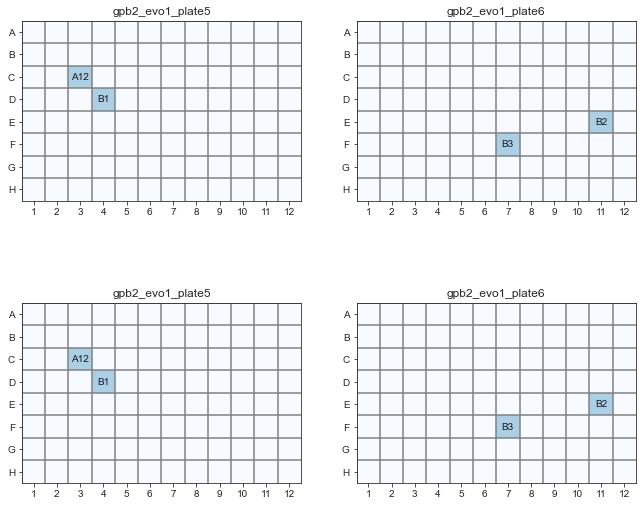

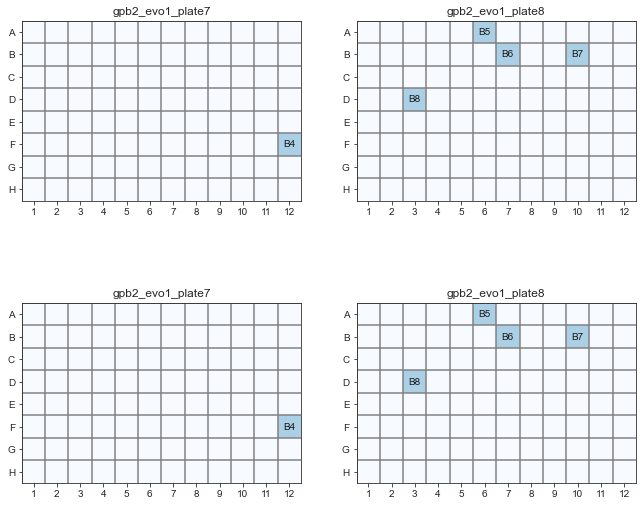

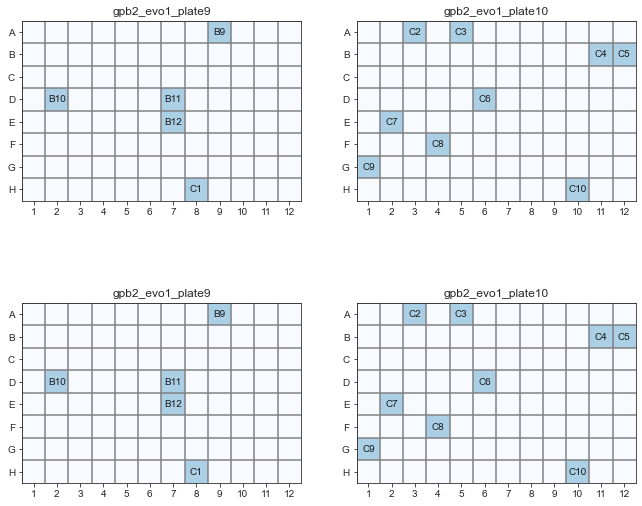

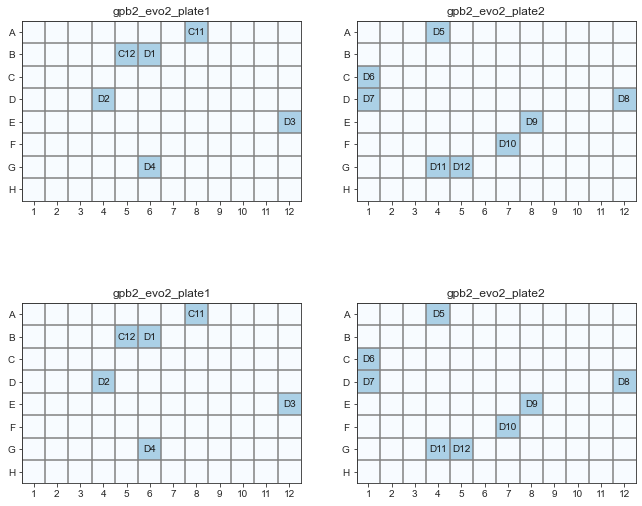

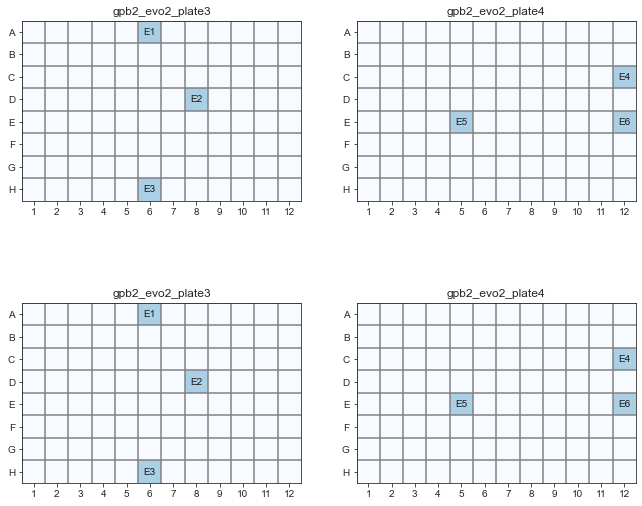

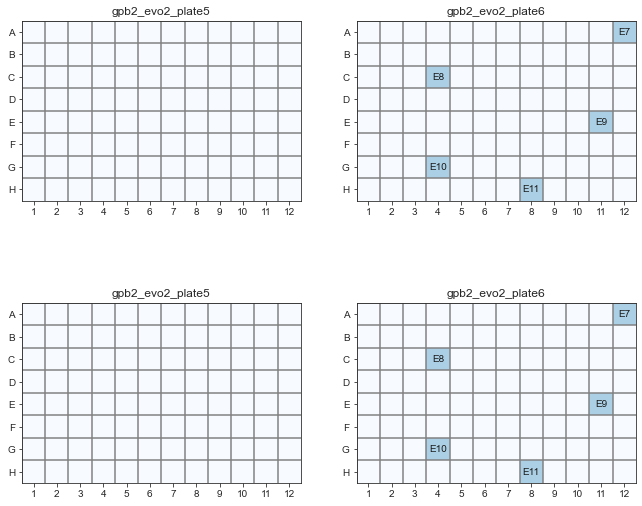

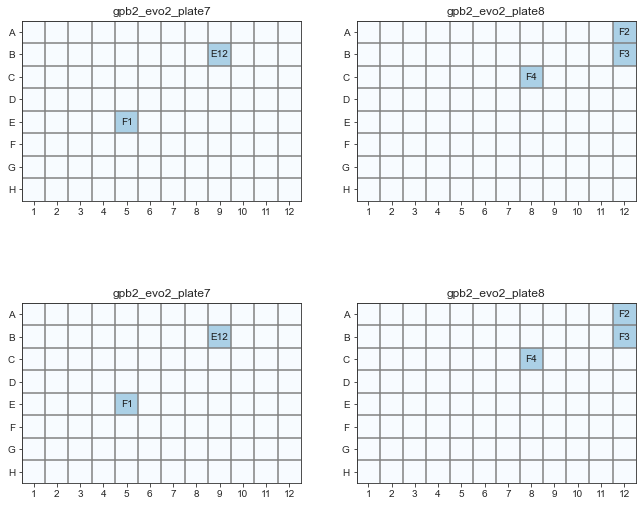

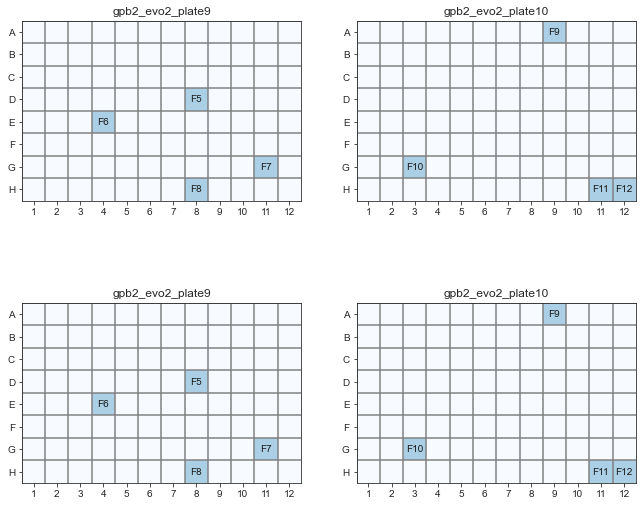

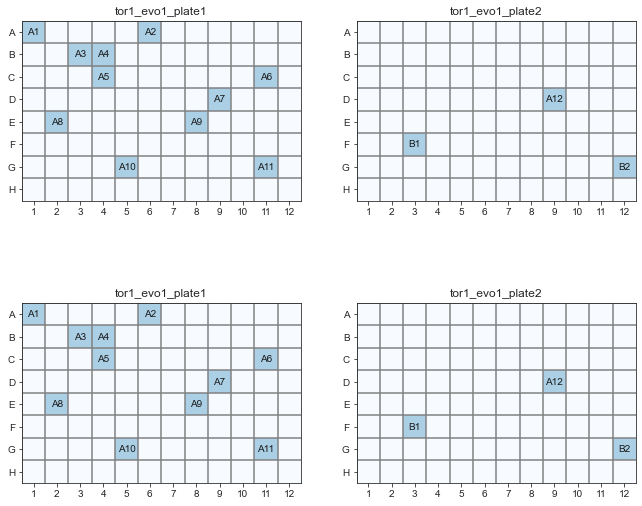

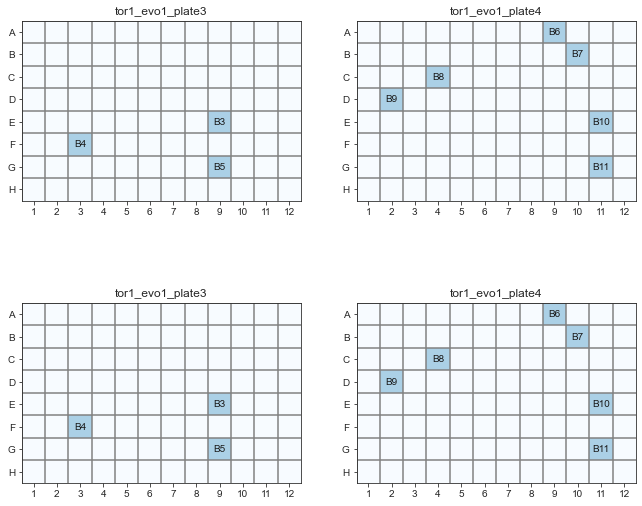

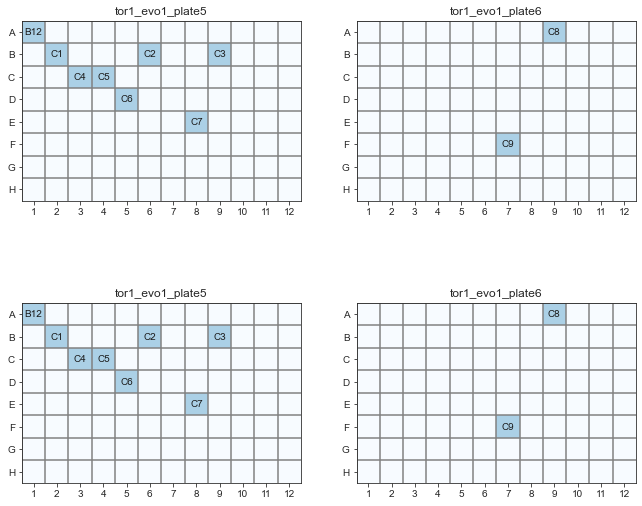

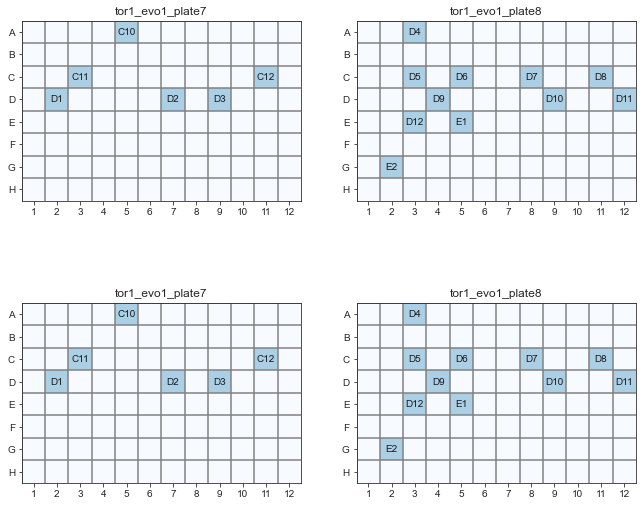

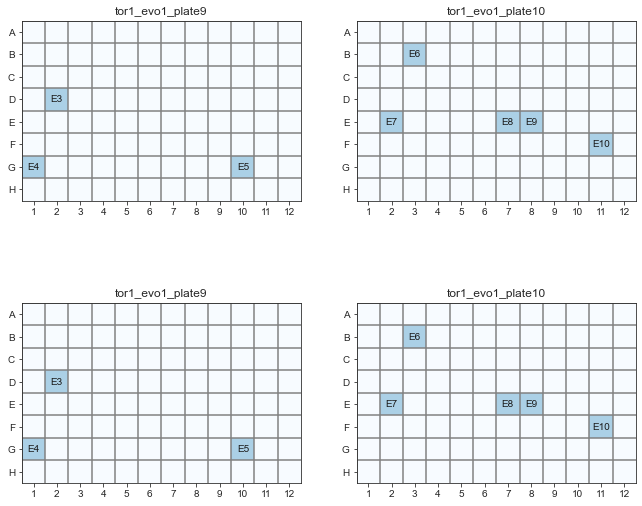

In [399]:
### PICKING from Aggeli plates


for anc in ['CYR1','GPB2','TOR1']:

    rearray_df = p.DataFrame()
    
    this_set = merged_fitness[(merged_fitness['ancestor']==anc) & 
                              (merged_fitness['barcode'].isin(to_sequence[anc])) & 
                              (merged_fitness['source_publication']=='Aggeli2020')]

    source_wells = {}
    destination_wells = {}
    source_wells_full = []
    destination_wells_full = []

    mapping_dict = {}

    running_wells_chosen = 0

    chosen_bcs = []
    backups = {}
    
    plate_names = ['_'.join(entry.split('_')[:-1]) for entry in this_set['cloneID_new'].values]
    well_names = [entry.split('_')[-1] for entry in this_set['cloneID_new'].values]
    
    this_set['plate'] = plate_names
    this_set['well'] = well_names
    plates = np.unique(plate_names)
    print(plates)

    for plate in plate_order[anc]:
        this_plate = this_set[this_set['plate']==plate]

        source_wells[f'{plate}'] = []
        destination_wells[f'{plate}'] = []
#         destination_wells_full[f'{plate}'] = []

        for well in well_order:
            well_name = f'{plate}-{well}'
            this_well = this_plate[this_plate['cloneID_new']==f'{plate}_{well}']
            
            if len(this_well.index) > 0:

                bc = this_well['barcode'].values[0]

                if bc in to_sequence[anc]:
                    if bc not in chosen_bcs:
                        print("here!!",f'{plate}-{well}',bc)
                        source_wells[f'{plate}'].append(f'{well}')

                        dest_plate_number = int(np.ceil((running_wells_chosen+1)/96))
                        destination_wells[f'{plate}'].append(well_order[(running_wells_chosen)%96])
                        mapping_dict[f'{plate}-{well}'] = well_order[(running_wells_chosen)%96]  

                        source_wells_full.append(f'{plate}-{well}')
                        destination_wells_full.append(f'Aggeli_{anc}_sequencingRearray_Plate{dest_plate_number}-{well_order[(running_wells_chosen)%96]}')
            #                     mapping_dict[f'{plate}-{well}'] = f'{dest_plate_number}-{well_order[(running_wells_chosen)%96]}'

                        chosen_bcs.append(bc)
                        running_wells_chosen += 1
                else:
                    print("skipping!!",f'{plate}-{well}',bc)
                        
            
#                 if bc not in chosen_bcs:
#                     source_wells[f'{plate}'].append(f'{well}')



#                     dest_plate_number = int(np.ceil((running_wells_chosen+1)/96))
#                     destination_wells[f'{plate}'].append(well_order[(running_wells_chosen)%96])
#                     mapping_dict[f'{plate}-{well}'] = well_order[(running_wells_chosen)%96]  

#                     source_wells_full.append(f'{plate}-{well}')
#                     destination_wells_full.append(f'Aggeli_{anc}_sequencingRearrayy_Plate{dest_plate_number}-{well_order[(running_wells_chosen)%96]}')
# #                     mapping_dict[f'{plate}-{well}'] = f'{dest_plate_number}-{well_order[(running_wells_chosen)%96]}'

#                     chosen_bcs.append(bc)
#                     running_wells_chosen += 1
#                 else:
#                     if bc in backups.keys():
#                         backups[bc].append(f'{plate}-{well}')
#                     else:
#                         backups[bc] = [f'{plate}-{well}']
                        
    rearray_df['source_well'] = source_wells_full
    rearray_df['destination_well'] = destination_wells_full
    rearray_df['barcode'] = chosen_bcs
#     rearray_df['backups'] = [backups[bc][:2] if bc in backups.keys() else np.nan for bc in chosen_bcs]
#     rearray_df['backup2'] = [backups[bc][1] if bc in backups.keys() else np.nan for bc in chosen_bcs]
#     rearray_df['backup3'] = [backups[bc][2] if bc in backups.keys() else np.nan for bc in chosen_bcs]
             
    rearray_df.to_csv(f'sequencing_rearray_Aggeli2020_{anc}_list.csv',index=False)
                        
    with PdfPages(f'sequencing_rearray_Aggeli2020_{anc}.pdf') as pdf:
    
        for pl,plate in enumerate(plate_order[anc]):

            these_sources = source_wells[f'{plate}']

            pick_me = [True if entry in these_sources else False for entry in well_order]
            pick_me  = np.asarray(pick_me).reshape(8,12)

            destinations = destination_wells[f'{plate}']
        #     destinations  = np.asarray(destinations).reshape(8,12)

            print(plate,pl%2)
            if (pl%2) == 0:
                fig  = plt.figure(figsize=(11*1,8.5*1))

                gs = gridspec.GridSpec(3, 2, figure=fig,height_ratios=[3.75,1,3.75],width_ratios=[12,12])

                this_ax = fig.add_subplot(gs[0])
            else:
                this_ax = fig.add_subplot(gs[1])

            draw_plate(this_ax,pick_me,destinations,plate)

            if (pl%2) == 0:
    #             fig  = plt.figure(figsize=(11,8.5))

    #             gs = gridspec.GridSpec(2, 2, figure=fig)

                this_ax = fig.add_subplot(gs[4])

            else:
                this_ax = fig.add_subplot(gs[5])

            draw_plate(this_ax,pick_me,destinations,plate)

        #     [i+0.5 for i in range(12)]
            plt.savefig(f'maps_for_sequencing_{plate}.pdf')

            if (pl%2) != 0 or pl == len(plates)-1:
                pdf.savefig()
#             elif :
                

    ### PRINT AT 110%!!!!

In [436]:
to_sequence_all

['GACAGAAAAGCCAAATGGATTTACCG_ATGGGAACACGGAATGATCTTTTATT',
 'GACAGAAAAGCCAAATGGATTTACCG_GTACAAACCTCTAAAGTTATTAATGG',
 'GACAGAAAAGCCAAATGGATTTACCG_AGTTAAAGCCCGAAAGCGGTTAGCTT',
 'GACAGAAAAGCCAAATGGATTTACCG_TATGAAACCGCGAACAACTTTGTGTA',
 'AGAACAAAAACTAAACTCATTCATGG_CGGAGAAGTGGCAAGAAGATTGTGAC',
 'GACAGAAAAGCCAAATGGATTTACCG_CTCATAACATAGAAGATGCTTCGCAG',
 'GACAGAAAAGCCAAATGGATTTACCG_GACCCAAAAGACAACCCGTTTTAGTG',
 'GACAGAAAAGCCAAATGGATTTACCG_ATGGTAACATGTAATCTAGTTGTATC',
 'GACAGAAAAGCCAAATGGATTTACCG_CGCGAAAATAGCTACACTGTTTCACG',
 'AGAACAAAAACTAAACTCATTCATGG_CTTTAAACCGTCAATTGGGTTTCAAT',
 'GACAGAAAAGCCAAATGGATTTACCG_TCGTCAATACGTAAGTCATTTCATAA',
 'GACAGAAAAGCCAAATGGATTTACCG_ATCCAAAGGGATAAACAATTTATCTA',
 'ACTTAAAAAGCAAACATGATTATTCA_GACTTAAGCACTAATGTGGTTGTTAG',
 'AGAACAAAAACTAAACTCATTCATGG_AGAAGAAAACTCAATTAGCTTAGATC',
 'GACAGAAAAGCCAAATGGATTTACCG_CTTGGAAACATAAACGATCTTATCTA',
 'GACAGAAAAGCCAAATGGATTTACCG_TCCGTAAGATTGAAACATTTTCGTAA',
 'GACAGAAAAGCCAAATGGATTTACCG_GCGTCAATGGAAAAGCGAATTGCGGG',
 'AGAACAAAAACT

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/804913007.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['plate'] = plate_names
/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_25029/804913007.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_set['well'] = well_names


['EVO1D_IRAs_rearray_Plate1' 'EVO1D_IRAs_rearray_Plate2'
 'EVO1D_IRAs_rearray_Plate3' 'EVO1D_IRAs_rearray_Plate4'
 'EVO1D_IRAs_rearray_Plate5' 'EVO1D_TCG_rearray_Plate1'
 'EVO1D_TCG_rearray_Plate2' 'EVO1D_TCG_rearray_Plate3'
 'EVO1D_TCG_rearray_Plate4' 'EVO1D_TCG_rearray_Plate5'
 'EVO1D_TCG_rearray_Plate6' 'EVO1D_TCG_rearray_Plate7'
 'EVO2D_IRA1_MIS_rearray_Plate1' 'EVO2D_IRA1_MIS_rearray_Plate2'
 'EVO2D_IRA1_NON_rearray_Plate1' 'EVO2D_IRA1_NON_rearray_Plate2'
 'EVO2D_IRA1_NON_rearray_Plate3' 'EVO3D_IRA1_MIS_rearray_Plate1'
 'EVO3D_IRA1_NON_rearray_Plate1' 'EVO3D_IRA1_NON_rearray_Plate2'
 'EVO3D_TCG_rearray_Plate1']
here!! EVO1D_IRAs_rearray_Plate1-A4 CATAAAAAGACTAATCTTATTAATGC_ATGTAAAATTGTAAGAATTTTATTAT
here!! EVO1D_IRAs_rearray_Plate1-B6 GAAATAAACCACAACGACATTCTAAT_TAATAAATATGGAACACTGTTATAGT
here!! EVO1D_IRAs_rearray_Plate1-B12 CATAAAAAGACTAATCTTATTAATGC_ACGAAAATAGTTAATTAGGTTCAATA
here!! EVO1D_IRAs_rearray_Plate1-C1 AATGCAATAATGAAATGATTTGAGGA_CATCGAAGGGAAAACCAGCTTAGCCG
here!! EVO1D_IR

here!! EVO2D_IRA1_MIS_rearray_Plate1-D2 TGATCAATCTACAAAAATATTTAATG_CTCTTAAACAGGAAATATATTATAGA
here!! EVO2D_IRA1_MIS_rearray_Plate1-D3 TGATCAATCTACAAAAATATTTAATG_ATTAGAAGCAAAAATTTCGTTTGAAG
here!! EVO2D_IRA1_MIS_rearray_Plate1-D4 TGATCAATCTACAAAAATATTTAATG_TGTGGAACGCAAAAGGAAATTCTTGC
here!! EVO2D_IRA1_MIS_rearray_Plate1-D7 TGATCAATCTACAAAAATATTTAATG_ACACTAACTCTCAACTATTTAGTTT
here!! EVO2D_IRA1_MIS_rearray_Plate1-D8 TGATCAATCTACAAAAATATTTAATG_CGATCAAATCTTAAAAATTTTGCTAA
here!! EVO2D_IRA1_MIS_rearray_Plate1-D10 TGATCAATCTACAAAAATATTTAATG_AACTGAAGACTAAATATGATTTCGGT
here!! EVO2D_IRA1_MIS_rearray_Plate1-D12 CATTGAATCACAAAATAGGTTAGATG_AGATTAACACAGAATCTCGTTAGACC
here!! EVO2D_IRA1_MIS_rearray_Plate1-E1 TGATCAATCTACAAAAATATTTAATG_TATATAAGATGCAATCCCTTTATGCG
here!! EVO2D_IRA1_MIS_rearray_Plate1-E2 CATTGAATCACAAAATAGGTTAGATG_TTGATAACAAACAAAGCGATTACAAT
here!! EVO2D_IRA1_MIS_rearray_Plate1-E3 TGATCAATCTACAAAAATATTTAATG_GGGCCAAACTGTAACGTTCTTGGGGG
here!! EVO2D_IRA1_MIS_rearray_Plate1-E8 CATTGAATCACAAAATAGG

here!! EVO2D_IRA1_NON_rearray_Plate2-E4 CCAACAAAACACAAATCTGTTGTGTA_AATGCAACGGTTAATGTGTATTATGTA
here!! EVO2D_IRA1_NON_rearray_Plate2-E7 CCAACAAAACACAAATCTGTTGTGTA_CGGCAAACAGGGAACGTAGTTAGGGG
here!! EVO2D_IRA1_NON_rearray_Plate2-E11 CCAACAAAACACAAATCTGTTGTGTA_CGACCAAACAGTAAGTGGTTTTAGCC
here!! EVO2D_IRA1_NON_rearray_Plate2-E12 CCAACAAAACACAAATCTGTTGTGTA_CTCCTAAACTGTAAATTAGTTGACGC
here!! EVO2D_IRA1_NON_rearray_Plate2-F1 CCAACAAAACACAAATCTGTTGTGTA_CGCTAAATTCTAAACGATTTTTCAGT
here!! EVO2D_IRA1_NON_rearray_Plate2-F6 CCAACAAAACACAAATCTGTTGTGTA_CGCCTAAACAATAAATTCGTTAAGCC
here!! EVO2D_IRA1_NON_rearray_Plate2-F11 CCAACAAAACACAAATCTGTTGTGTA_CTGTCAAGATGGAACGGTGTTGGGAG
here!! EVO2D_IRA1_NON_rearray_Plate2-G3 CCAACAAAACACAAATCTGTTGTGTA_GCAGGAAGAGTAAAAGGCTTTGGCGT
here!! EVO2D_IRA1_NON_rearray_Plate2-G4 CCAACAAAACACAAATCTGTTGTGTA_TATAGAACCATCAAAGAGTTTATGCT
here!! EVO2D_IRA1_NON_rearray_Plate2-G9 CCAACAAAACACAAATCTGTTGTGTA_AGACTAAGTGGAAATAGAGTTTAGAC
here!! EVO2D_IRA1_NON_rearray_Plate2-G11 CCAACAAAACACAAA

here!! EVO3D_IRA1_NON_rearray_Plate2-F8 ATCACAATAACTAAACTGATTCTTCA_TTGCTAAATACATAAATCGCTTGGCTT
here!! EVO3D_TCG_rearray_Plate1-A4 GACAGAAAAGCCAAATGGATTTACCG_ATGGGAACACGGAATGATCTTTTATT
here!! EVO3D_TCG_rearray_Plate1-A6 CCAACAAAAGGAAACGTATTTATTGA_TCGACAAATTGTAAGCATATTGTCAC
here!! EVO3D_TCG_rearray_Plate1-A8 CAGAAAAGCCATAACGCTATTTGAAA_ATGGTAACAGGAAAATTTTTTCGATA
here!! EVO3D_TCG_rearray_Plate1-A9 CCGCCAATCCCGAACCCCGTTTCGCC_TCCCAAACAAGAAACAATATTGGCAA
here!! EVO3D_TCG_rearray_Plate1-A10 GACAGAAAAGCCAAATGGATTTACCG_GTACAAACCTCTAAAGTTATTAATGG
here!! EVO3D_TCG_rearray_Plate1-B1 CCGCCAATCCCGAACCCCGTTTCGCC_GACAAAACTAATAATTAATTTGCATA
here!! EVO3D_TCG_rearray_Plate1-B6 GACAGAAAAGCCAAATGGATTTACCG_AATAAAACCGACAATTTCTTTTATAT
here!! EVO3D_TCG_rearray_Plate1-B7 CAGAAAAGCCATAACGCTATTTGAAA_GTAGCAAGATCGAAGATGTTTAGATA
here!! EVO3D_TCG_rearray_Plate1-B8 GACAGAAAAGCCAAATGGATTTACCG_TATGAAACCGCGAACAACTTTGTGTA
here!! EVO3D_TCG_rearray_Plate1-B10 AGAACAAAAACTAAACTCATTCATGG_CTTTAAACCGTCAATTGGGTTTCAAT
here!! EVO3D_

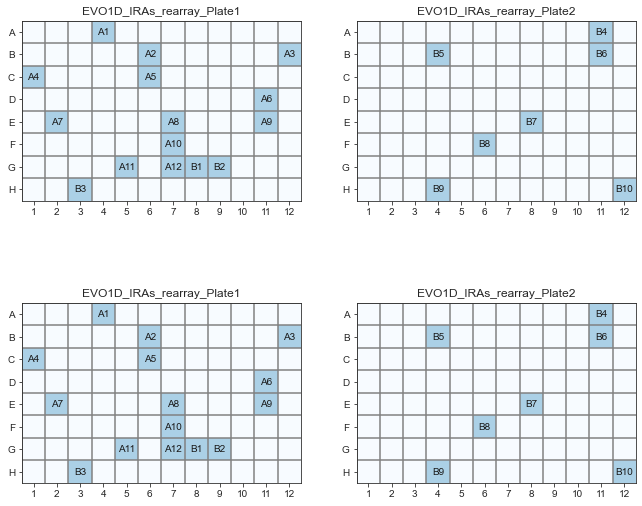

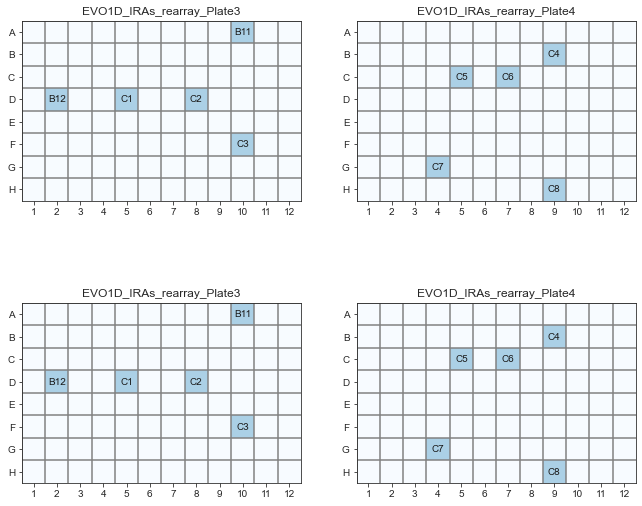

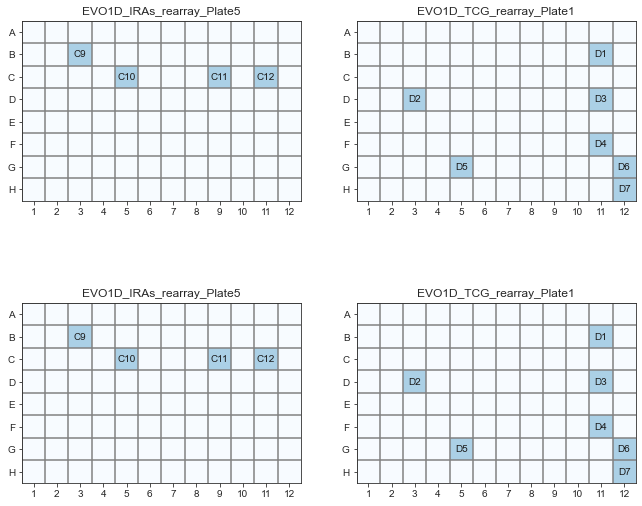

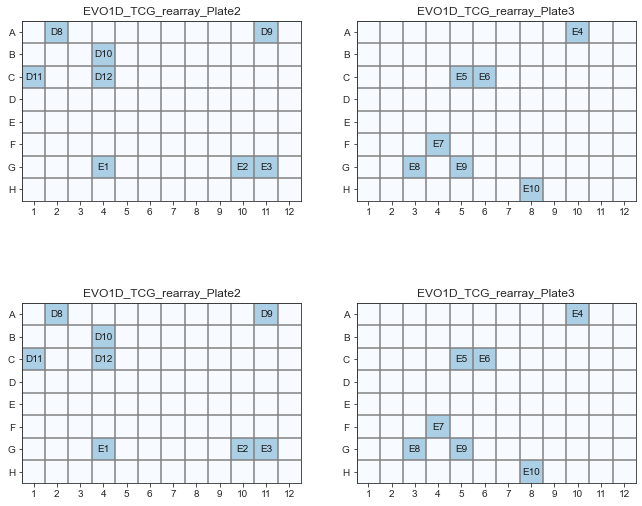

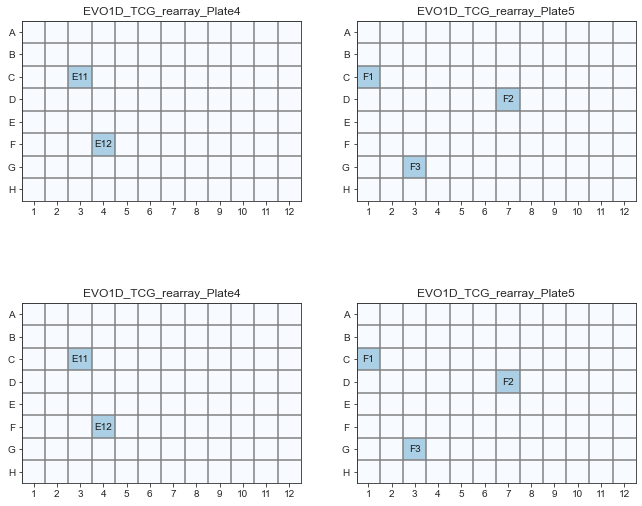

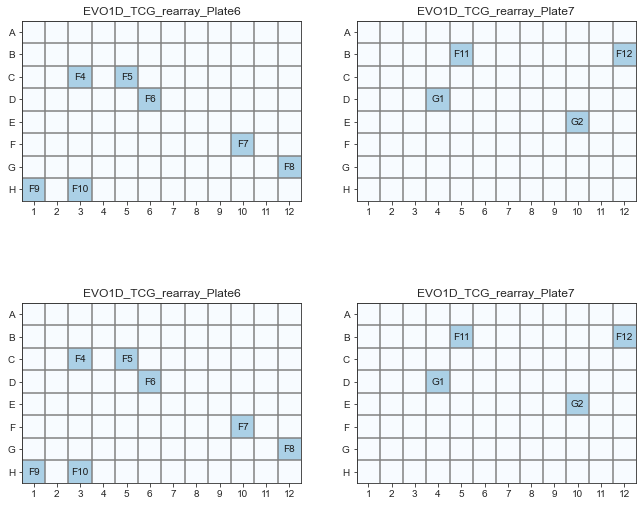

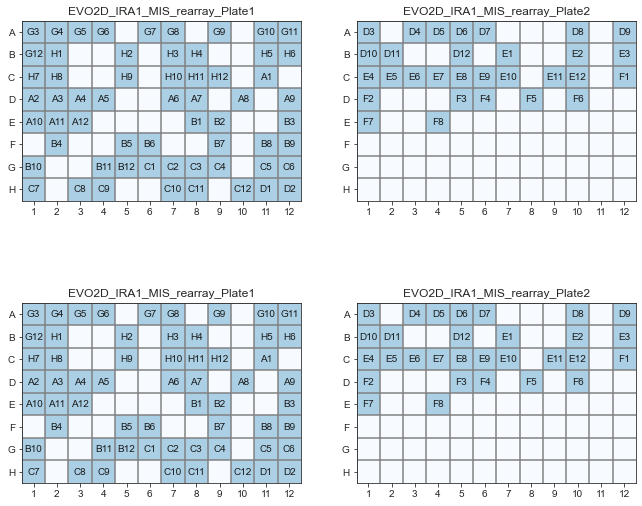

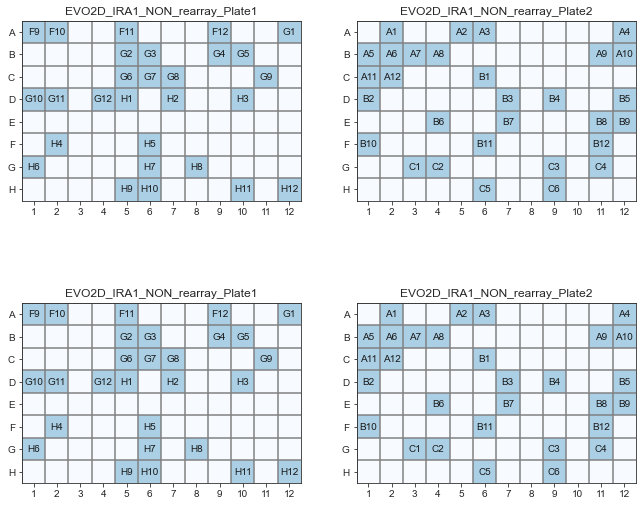

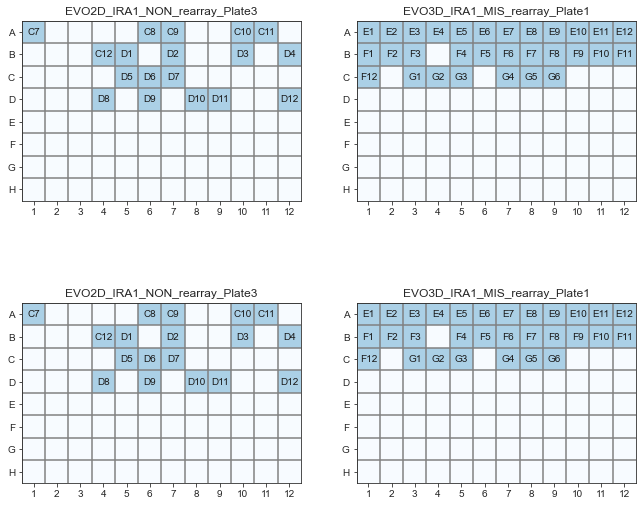

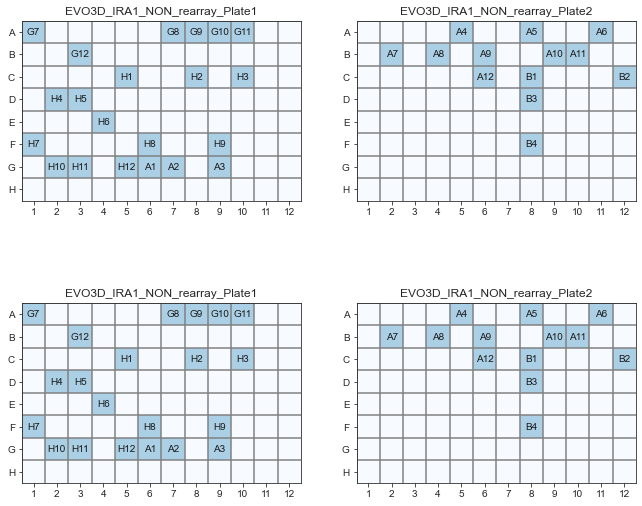

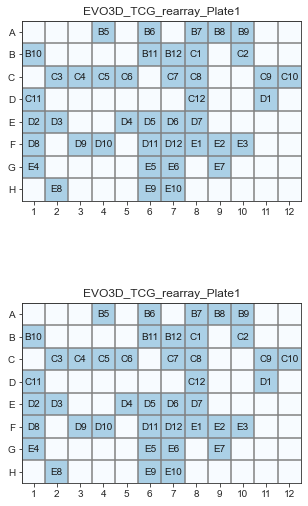

In [443]:
### PICKING from Kinsler + Li plates


# for anc in ['CYR1','GPB2','TOR1']:

rearray_df = p.DataFrame()

this_set = merged_fitness[(merged_fitness['barcode'].isin(to_sequence_all)) & 
                          (merged_fitness['source_publication']=='This_study')]

source_wells = {}
destination_wells = {}
source_wells_full = []
destination_wells_full = []

mapping_dict = {}

running_wells_chosen = 0

chosen_bcs = []
backups = {}

plate_names = [entry.split('-')[0] for entry in this_set['cloneID_new'].values]
well_names = [entry.split('-')[-1] for entry in this_set['cloneID_new'].values]

this_set['plate'] = plate_names
this_set['well'] = well_names
plates = np.unique(plate_names)
print(plates)

for plate in plates:
    this_plate = this_set[this_set['plate']==plate]

    source_wells[f'{plate}'] = []
    destination_wells[f'{plate}'] = []
#         destination_wells_full[f'{plate}'] = []

    for well in well_order:
        well_name = f'{plate}-{well}'
        this_well = this_plate[this_plate['cloneID_new']==f'{plate}-{well}']

        if len(this_well.index) > 0:

            bc = this_well['barcode'].values[0]
                                                        

            if bc in to_sequence_all:
                if bc not in chosen_bcs:
                    print("here!!",f'{plate}-{well}',bc)
                    source_wells[f'{plate}'].append(f'{well}')

                    dest_plate_number = int(np.ceil((running_wells_chosen+1)/96))
                    destination_wells[f'{plate}'].append(well_order[(running_wells_chosen)%96])
                    mapping_dict[f'{plate}-{well}'] = well_order[(running_wells_chosen)%96]  

                    source_wells_full.append(f'{plate}-{well}')
                    destination_wells_full.append(f'EvolvingFront_Sequencing_Plate{dest_plate_number}-{well_order[(running_wells_chosen)%96]}')
        #                     mapping_dict[f'{plate}-{well}'] = f'{dest_plate_number}-{well_order[(running_wells_chosen)%96]}'

                    chosen_bcs.append(bc)
                    running_wells_chosen += 1
            else:
                print("skipping!!",f'{plate}-{well}',bc)


#                 if bc not in chosen_bcs:
#                     source_wells[f'{plate}'].append(f'{well}')



#                     dest_plate_number = int(np.ceil((running_wells_chosen+1)/96))
#                     destination_wells[f'{plate}'].append(well_order[(running_wells_chosen)%96])
#                     mapping_dict[f'{plate}-{well}'] = well_order[(running_wells_chosen)%96]  

#                     source_wells_full.append(f'{plate}-{well}')
#                     destination_wells_full.append(f'Aggeli_{anc}_sequencingRearrayy_Plate{dest_plate_number}-{well_order[(running_wells_chosen)%96]}')
# #                     mapping_dict[f'{plate}-{well}'] = f'{dest_plate_number}-{well_order[(running_wells_chosen)%96]}'

#                     chosen_bcs.append(bc)
#                     running_wells_chosen += 1
#                 else:
#                     if bc in backups.keys():
#                         backups[bc].append(f'{plate}-{well}')
#                     else:
#                         backups[bc] = [f'{plate}-{well}']

rearray_df['source_well'] = source_wells_full
rearray_df['destination_well'] = destination_wells_full
rearray_df['barcode'] = chosen_bcs
#     rearray_df['backups'] = [backups[bc][:2] if bc in backups.keys() else np.nan for bc in chosen_bcs]
#     rearray_df['backup2'] = [backups[bc][1] if bc in backups.keys() else np.nan for bc in chosen_bcs]
#     rearray_df['backup3'] = [backups[bc][2] if bc in backups.keys() else np.nan for bc in chosen_bcs]

rearray_df.to_csv(f'sequencing_maps/EvolvingFront_Sequencing_list.csv',index=False)

with PdfPages(f'sequencing_maps/EvolvingFront_Sequencing.pdf') as pdf:

    for pl,plate in enumerate(plates):

        these_sources = source_wells[f'{plate}']

        pick_me = [True if entry in these_sources else False for entry in well_order]
        pick_me  = np.asarray(pick_me).reshape(8,12)

        destinations = destination_wells[f'{plate}']
    #     destinations  = np.asarray(destinations).reshape(8,12)

        print(plate,pl%2)
        if (pl%2) == 0:
            fig  = plt.figure(figsize=(11*1,8.5*1))

            gs = gridspec.GridSpec(3, 2, figure=fig,height_ratios=[3.75,1,3.75],width_ratios=[12,12])

            this_ax = fig.add_subplot(gs[0])
        else:
            this_ax = fig.add_subplot(gs[1])

        draw_plate(this_ax,pick_me,destinations,plate)

        if (pl%2) == 0:
#             fig  = plt.figure(figsize=(11,8.5))

#             gs = gridspec.GridSpec(2, 2, figure=fig)

            this_ax = fig.add_subplot(gs[4])

        else:
            this_ax = fig.add_subplot(gs[5])

        draw_plate(this_ax,pick_me,destinations,plate)

    #     [i+0.5 for i in range(12)]
        plt.savefig(f'sequencing_maps/maps_for_sequencing_EvolvingFront_Sequencing_{plate}.pdf')

        if (pl%2) != 0 or pl == len(plates)-1:
            pdf.savefig()
#             elif :


### PRINT AT 110%!!!!

In [441]:
well_names

['A1',
 'A4',
 'A1',
 'C4',
 'A2',
 'B6',
 'C12',
 'B7',
 'G7',
 'C5',
 'A6',
 'A1',
 'A12',
 'A6',
 'H6',
 'B4',
 'A3',
 'A7',
 'F5',
 'C7',
 'D10',
 'A10',
 'B8',
 'A10',
 'D7',
 'A1',
 'B1',
 'B8',
 'B12',
 'B8',
 'B10',
 'B9',
 'E6',
 'C9',
 'D1',
 'B5',
 'F2',
 'B9',
 'C2',
 'C8',
 'B2',
 'H7',
 'C3',
 'B6',
 'A5',
 'A9',
 'C6',
 'E7',
 'A7',
 'B12',
 'H6',
 'H3',
 'B10',
 'G11',
 'F10',
 'C12',
 'A3',
 'E1',
 'G6',
 'A12',
 'C8',
 'B3',
 'E12',
 'H7',
 'H1',
 'E8',
 'A9',
 'D2',
 'D4',
 'G8',
 'C9',
 'B11',
 'G7',
 'C3',
 'F9',
 'F4',
 'A12',
 'F11',
 'D6',
 'C1',
 'A2',
 'C5',
 'A2',
 'B3',
 'C7',
 'G5',
 'H3',
 'C5',
 'D7',
 'D8',
 'E2',
 'A7',
 'A12',
 'E4',
 'C6',
 'E4',
 'H2',
 'B2',
 'C1',
 'D5',
 'A11',
 'G9',
 'B1',
 'C7',
 'E11',
 'B7',
 'C2',
 'C1',
 'A10',
 'B10',
 'A4',
 'G3',
 'D9',
 'G12',
 'A11',
 'G4',
 'A11',
 'A4',
 'H12',
 'C3',
 'D7',
 'B12',
 'C2',
 'G4',
 'H9',
 'B11',
 'C6',
 'A6',
 'E11',
 'H4',
 'G2',
 'F9',
 'B9',
 'B1',
 'C11',
 'C10',
 'D1',
 'D4',
 'D

In [23]:
sns.set_style('dark')
sns.set_style('ticks')
plt.style.use('dark_background')

In [39]:
wt_map = {'WT':'w',
             'GPB2':'#4daf4a',
             'CYR1':'#e41a1c',
             'TOR1':'#6a51a3',
             'IRA1_MIS':'#02818a',
             'IRA1_NON':'#1f78b4',
            }

marker_map = {'Evo1D':'o',
              'Evo2D':'^',
              'Evo3D':'s',
              'Evo5D':'p',
              'Evo1_5D':'D',
              'unknown':'x',
             }

color_map = {        
             'WT':{'Evo1D':'#cccccc','Evo2D':'#f7f7f7','Evo5D':'#969696','Evo1_5D':'#636363'},
#              'WT':{'Evo1D':'#cccccc','Evo2D':'#252525','Evo5D':'#969696','Evo1_5D':'#636363'},
             'GPB2':{'Evo1D':'#bae4b3','Evo2D':'#74c476','Evo3D':'#238b45','unknown':'#bae4b3'},
             'CYR1':{'Evo1D':'#fcae91','Evo2D':'#fb6a4a','Evo3D':'#cb181d','unknown':'#fcae91'},
             'TOR1':{'Evo1D':'#cbc9e2','Evo2D':'#9e9ac8','Evo3D':'#6a51a3','unknown':'#cbc9e2'},
             'IRA1_MIS':{'Evo1D':'#bdc9e1','Evo2D':'#67a9cf','Evo3D':'#02818a','unknown':'#bdc9e1'},
             'IRA1_NON':{'Evo1D':'#bdd7e7','Evo2D':'#6baed6','Evo3D':'#2171b5','unknown':'#bdd7e7'}
            }

In [28]:
rebarcoding_source_mutants = {
'IRA1_MIS':'CGCTAAAGACATAATGTGGTTTGTTG_CTTCCAACAAAAAATCATTTTTATAC', # BCID 43361 from venkataram 2016
'IRA1_NON':'CGCTAAAGACATAATGTGGTTTGTTG_AGAGTAATCTGCAAGATTCTTTTTCT', # BCID 21967 from venkataram 2016
'CYR1':    'CGCTAAAGACATAATGTGGTTTGTTG_CTCGAAACAGGAAAAGCACTTATCGA', # BCID 43692 from venkataram 2016
'TOR1':    'CGCTAAAGACATAATGTGGTTTGTTG_TAGACAAAATGCAATTGTATTGTCAG' , # BCID 21543 from venkataram 2016
'GPB2':    'CGCTAAAGACATAATGTGGTTTGTTG_TCATGAACGGATAAGCTGGTTGGTTG' , # BCID 7774 from venkataram 2016
}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

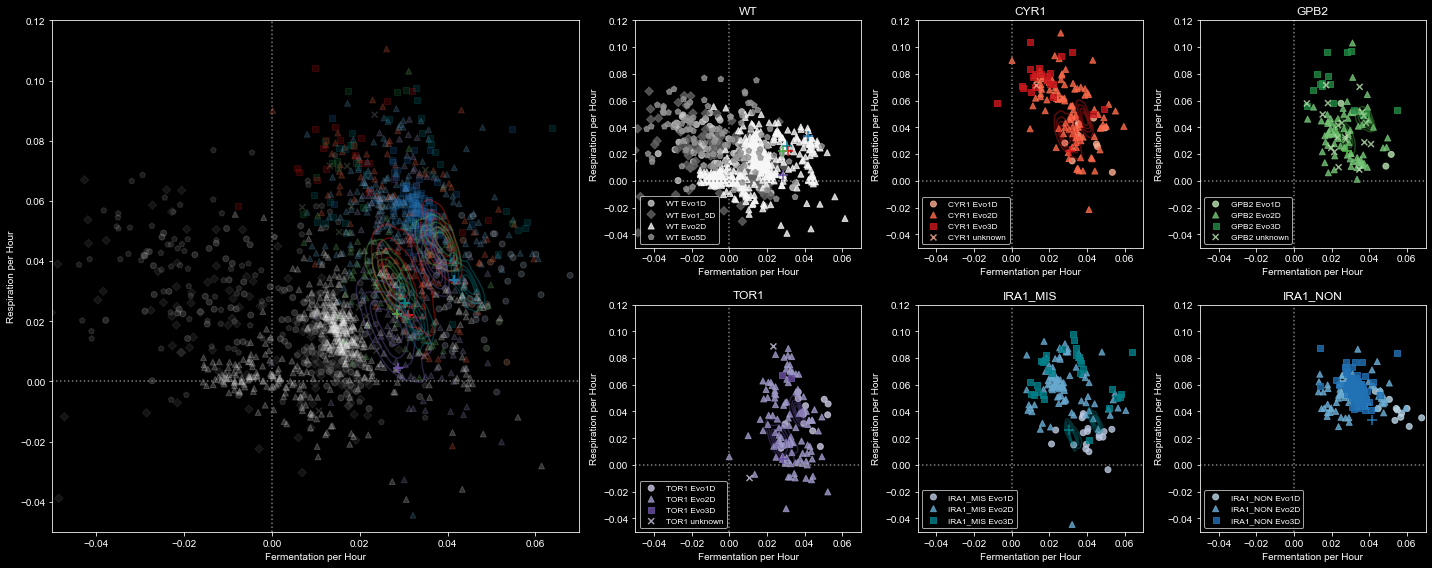

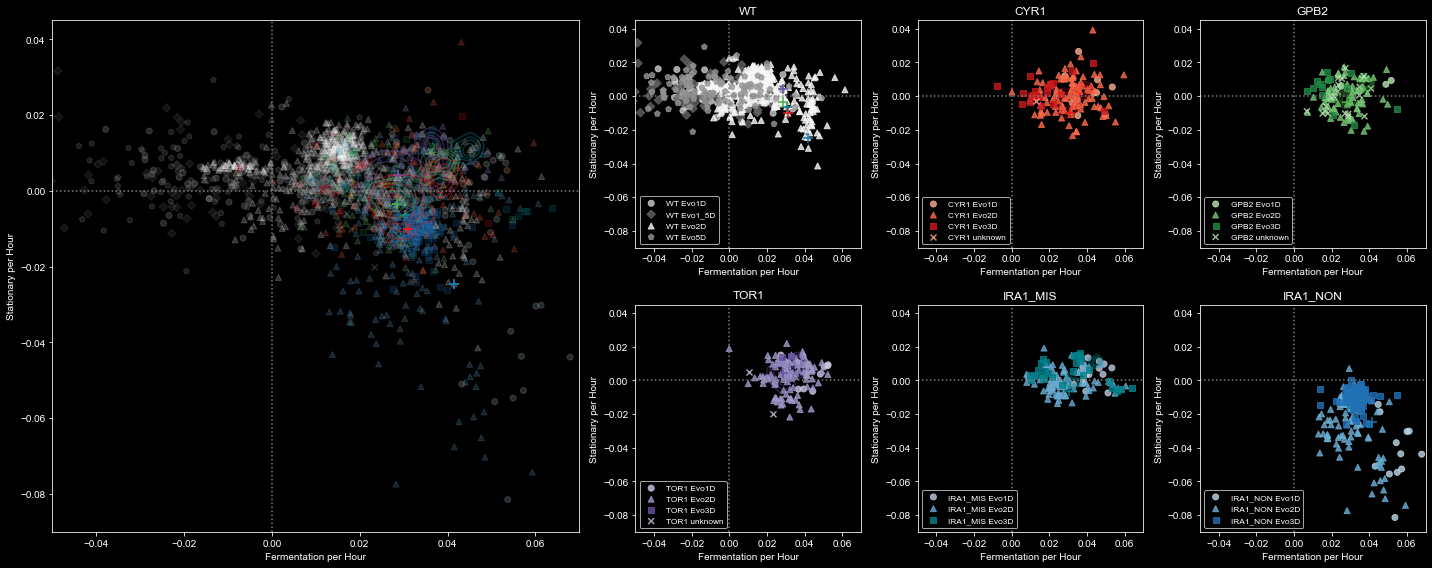

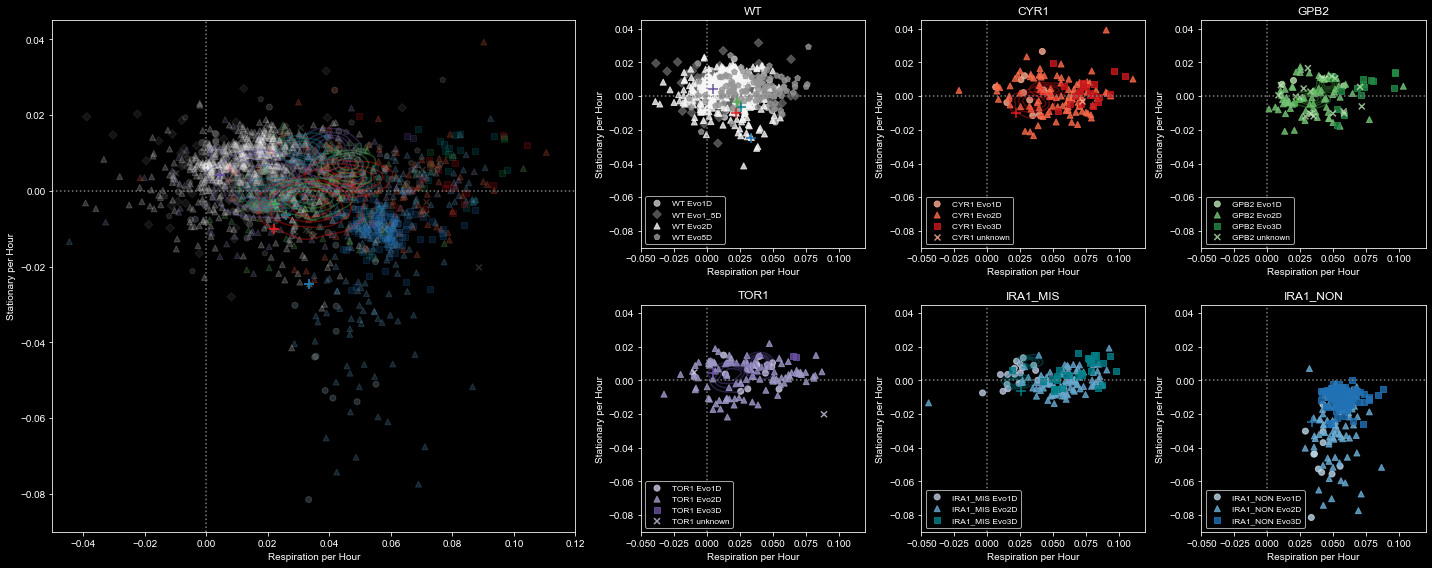

In [41]:


colors = [color_map[anc] for anc in merged_fitness['ancestor']]
# colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in nonan_merged['source_publication_x']]

# non_diploid = merged_fitness[merged_fitness['ploidy']!='Diploid']

xlabel = 'Fermentation per Hour'
ylabel = 'Respiration per Hour'
xdata = 'FerPerHour'
ydata = 'ResPerHour'

xlabel = 'Stationary per Hour'
ylabel = 'Respiration per Hour'
xdata = 'StaPerHour'
ydata = 'ResPerHour'
labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

# evo_cond_list = ['Evo1D']
# evo_cond_list = ['Evo2D']
# evo_cond_list = ['Evo3D']

for xdata,ydata in combinations(['FerPerHour','ResPerHour','StaPerHour'],2):
# publication_list = [['This_study','Li2019','Aggeli2020','Venkataram2015'],['Venkataram2015'],['Li2019'],['Aggeli2020'],['This_study'],['Venkataram2015','This_study']] 
    ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]
    fig = plt.figure(figsize=(20,8))
    outer_gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])

    for a,ancs in enumerate(ancestor_list):
        inner_gs = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)
#         this_anc = non_diploid[non_diploid['ancestor'].isin(ancs)]
        
        this_anc = merged_fitness[merged_fitness['ancestor'].isin(ancs)]
        
        these_pure_diploids = [bc for anc in ancs if anc != 'WT'  for bc in pure_diploid_dict[anc]  ]
        these_neutral_haploids =  [bc for anc in ancs if anc != 'WT'  for bc in neutral_haploid_dict[anc]  ]
        
        interesting_muts = this_anc[~this_anc['barcode'].isin(these_neutral_haploids+these_pure_diploids)]

        if len(ancs) > 1:
            fig.add_subplot(outer_gs[0]) 
        else:
            fig.add_subplot(inner_gs[a-1])
            
        for anc in ancs:
            if anc != 'WT':
                this_pure_diploid = this_anc[this_anc['barcode'].isin(pure_diploid_dict[anc])]

                sns.kdeplot(this_pure_diploid[xdata].values,this_pure_diploid[ydata].values,
                            color=wt_map[anc],alpha=0.4,thresh=0.2,levels=5)

                this_neutral_haploid = this_anc[this_anc['barcode'].isin(neutral_haploid_dict[anc])]

                sns.kdeplot(this_neutral_haploid[xdata].values,this_neutral_haploid[ydata].values,
                            color=wt_map[anc],alpha=0.4,thresh=0.2,levels=5)
#             else:
#                 this_pure_dip


        for evo_cond in np.unique(this_anc['evolution_condition'].values):
#         for evo_cond in evo_cond_list:
            this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]

            colors = [color_map[anc][evo_cond] for anc,evo_cond in zip(this_data['ancestor'],this_data['evolution_condition'])]

            if len(ancs) > 1:
                alpha = 0.2
#                 plt.errorbar(this_data[xdata].values,this_data[ydata].values,
#                             xerr=this_data[xdata+'_error'].values,
#                             yerr=this_data[ydata+'_error'].values,
#                             alpha=alpha,color='k',marker=' ',ls='none')
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            alpha=alpha,color=colors,marker=marker_map[evo_cond])

               
                
            else:
                alpha = 0.8
#                 plt.errorbar(this_data[xdata].values,this_data[ydata].values,
#                             xerr=this_data[xdata+'_error'].values,
#                             yerr=this_data[ydata+'_error'].values,
#                             alpha=alpha,color='k',marker=' ',ls='none',label=f'{ancs[0]} {evo_cond}')
                plt.scatter(this_data[xdata].values,this_data[ydata].values,
                            alpha=alpha,color=colors,marker=marker_map[evo_cond],label=f'{ancs[0]} {evo_cond}')

               
                plt.legend(loc='lower left',fontsize='small')
                plt.title(f'{ancs[0]}')


#         for anc in ancs:
        for anc in ancs:
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==rebarcoding_source_mutants[anc]]
#                 plt.errorbar(background_mutant[xdata].values,background_mutant[ydata].values,
#                             xerr=background_mutant[xdata+'_error'].values,
#                             yerr=background_mutant[ydata+'_error'].values,
#                             marker=' ',color='k',ls='none')
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=wt_map[anc],s=100)
            else:
                for anc2 in rebarcoding_source_mutants.keys():
                    background_mutant = merged_fitness[merged_fitness['barcode']==rebarcoding_source_mutants[anc2]]

                    plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=wt_map[anc2],s=100)


                    


        plt.xlim(lims[xdata][0],lims[xdata][1])
        plt.ylim(lims[ydata][0],lims[ydata][1])

        plt.xlabel(labels[xdata])
        plt.ylabel(labels[ydata])

#         plt.axvline(0,color='k',linestyle=':')
#         plt.axhline(0,color='k',linestyle=':')
        
        plt.axvline(0,color='gray',linestyle=':')
        plt.axhline(0,color='gray',linestyle=':')


    plt.tight_layout()
    plt.savefig(f'plots/tradeoffs_{xdata}_{ydata}_Dark.pdf',bbox_inches='tight')
#     plt.savefig(f'plots/tradeoffs_{xdata}_{ydata}_{evo_cond}_Dark.pdf',bbox_inches='tight')

#     plt.savefig(f'plots/tradeoffs_{xdata}_{ydata}_withError.pdf',bbox_inches='tight')




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

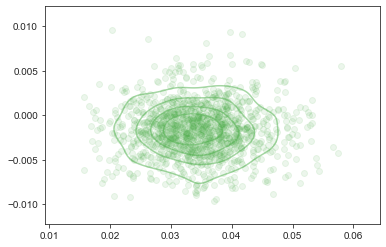

In [51]:
this_neutral_haploid = merged_fitness[merged_fitness['barcode'].isin(neutral_haploid_dict['GPB2'])]
plt.scatter(this_neutral_haploid[xdata].values,this_neutral_haploid[ydata].values,
           color=wt_map['GPB2'],alpha=0.1)
sns.kdeplot(this_neutral_haploid[xdata].values,this_neutral_haploid[ydata].values,
            color=wt_map['GPB2'],alpha=0.5,thresh=0.2,levels=5)

In [35]:
this_anc[this_anc['barcode'].isin(neutral_haploid_dict['GPB2'])]

Empty DataFrame
Columns: [Fit1D-2%-R1_error, Fit1D-2%-R1_fitness, Fit1D-2%-R2_error, Fit1D-2%-R2_fitness, Fit1D-5%-R1_error, Fit1D-5%-R1_fitness, Fit1D-5%-R2_error, Fit1D-5%-R2_fitness, Fit2D-2%-R1_error, Fit2D-2%-R1_fitness, Fit2D-2%-R2_error, Fit2D-2%-R2_fitness, Fit2D-5%-R1_error, Fit2D-5%-R1_fitness, Fit2D-5%-R2_error, Fit2D-5%-R2_fitness, Fit3D-2%-R1_error, Fit3D-2%-R1_fitness, Fit3D-2%-R2_error, Fit3D-2%-R2_fitness, Fit3D-2%-R3_error, Fit3D-2%-R3_fitness, Fit3D-5%-R1_error, Fit3D-5%-R1_fitness, Fit3D-5%-R2_error, Fit3D-5%-R2_fitness, Fit3D-5%-R3_error, Fit3D-5%-R3_fitness, Fit5D-2%-R1_error, Fit5D-2%-R1_fitness, Fit5D-2%-R2_error, Fit5D-2%-R2_fitness, Fit5D-2%-R3_error, Fit5D-2%-R3_fitness, Fit5D-5%-R1_error, Fit5D-5%-R1_fitness, Fit5D-5%-R2_error, Fit5D-5%-R2_fitness, Fit5D-5%-R3_error, Fit5D-5%-R3_fitness, BCID, Fit1D-5%-R1-T2, Fit1D-2%-R1-T4, Fit5D-2%-R2-T1, Fit2D-2%-R1-T1, Fit5D-2%-R3-T2, Fit3D-2%-R3-T2, Fit2D-5%-R2-T2, Fit1D-2%-R1-T3, Fit1D-2%-R1-T6, Fit2D-2%-R1-T4, Fit5D-2%-R3-T1, Fit2D-5%-R1-T4, Fit1D-2%-R1-T2, Fit2D-2%-R2-T4, Fit5D-5%-R3-T2, Fit2D-5%-R1-T2, Fit2D-2%-R1-T5, Fit2D-5%-R2-T5, Fit3D-5%-R2-T1, Fit1D-2%-T0, Fit3D-2%-T0, Fit2D-5%-R1-T1, Fit3D-2%-R1-T2, Fit1D-2%-R2-T3, Fit1D-2%-R2-T6, Fit3D-5%-R3-T2, Fit2D-5%-R1-T6, Fit1D-5%-R1-T3, Fit5D-5%-R3-T1, Fit3D-5%-T0, Fit1D-5%-R1-T5, Fit5D-5%-R1-T2, Fit5D-2%-T0, Fit2D-2%-R1-T2, Fit2D-2%-R2-T6, Fit2D-2%-R2-T2, Fit2D-2%-R2-T5, Fit5D-2%-R1-T2, Fit3D-2%-R3-T1, Fit2D-5%-R1-T5, Fit3D-5%-R1-T1, Fit1D-5%-T0, Fit3D-5%-R2-T2, Fit3D-5%-R1-T2, Fit2D-2%-R1-T6, Fit3D-5%-R3-T1, Fit1D-2%-R1-T1, Fit5D-2%-R1-T1, Fit1D-5%-R1-T6, Fit1D-5%-R1-T4, Fit1D-5%-R2-T5, Fit2D-2%-T0, Fit3D-2%-R2-T2, Fit1D-2%-R1-T5, Fit1D-2%-R2-T4, Fit2D-5%-R2-T4, Fit2D-2%-R2-T1, Fit2D-5%-R1-T3, Fit5D-5%-T0, ...]
Index: []

[0 rows x 324 columns]

In [81]:
merged_fitness[merged_fitness['gene'].isin(['KSP1'])][['evolution_condition','ancestor','FerPerHour','ResPerHour','StaPerHour']]

evolution_condition ancestor  FerPerHour  ResPerHour  StaPerHour
3714               Evo2D     GPB2    0.018877    0.059313    0.007089
4379               Evo2D     CYR1    0.017517    0.075614    0.002382

In [88]:
for anc in anc_list:
# for anc in ['IRA1_NON']:
#     print(anc)
    for bc1 in missing_targets[anc]:
        print(anc,'Missing:',bc1)
        for bc2 in merged_fitness['barcode'].values:
            
            this_dist = Levenshtein.distance(str(bc1),str(bc2))
            high_complex_dist = Levenshtein.distance(str(bc1.split('_')[1]),str(bc2.split('_')[1]))
            if this_dist > 0:
                if 0 < this_dist < 5:
                    print(this_dist,bc2)
                elif bc1.split('_')[1] == bc2.split('_')[1]:
                    print(this_dist,bc2)
                elif high_complex_dist < 3:
                    print(high_complex_dist,bc2)
#                 print(bc1)
#                 print(bc2)
#         print(bc1,'n',bc2,this_dist)
#     r_dists[f'{reverse_primers[r1]}_{reverse_primers[r2]}'] = Levenshtein.distance(str(r1),str(r2))

CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_CATAGAAGATCGAAGTGGTTTGGGCT
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_TGACTAAATGGAAACAGCGTTGTTCG
CYR1 Missing: ACTTAAAAAGCAAACATGATTATTCA_CGTTATAAGGTGAAACGGGATTTCTTG
CYR1 Missing: AGAACAAAAACTAAACTCATTCATGG_TATCGAATTTTAAAGTAATTTCATGC
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_CGACGAATAATCAAGTGTGTTACCTT
CYR1 Missing: ACTTAAAAAGCAAACATGATTATTCA_ATAAAAAGAGAAAATTATATTAATTA
CYR1 Missing: AGAACAAAAACTAAACTCATTCATGG_ATTCAAATTGTGAAGTATTTTATCAT
CYR1 Missing: AGAACAAAAACTAAACTCATTCATGG_AGGTAAAGTTTTAAAGCTTTTGCATT
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_GCAGTAAAACTTAACGAGGTTTTTTC
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_ACTTCAATATATAAAATTTTTCTTTT
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_CCATAAAAACAGAACTATTTTTCATC
CYR1 Missing: GACAGAAAAGCCAAATGGATTTACCG_TCCGATATCGGTACTCAGGTTGGTTC
GPB2 Missing: CCGCCAATCCCGAACCCCGTTTCGCC_CCTAAAACATCCAAAGTTTTTATGG
GPB2 Missing: GTATTAAAATTAAAAATAATTGCACA_GTCTCAAGCGAAAAGGTCGTTACCGG
GPB2 Missing: CCGCCAATCCCGAACCCCGTTTCGCC_ATATGAA

In [197]:
str(bc1.split('_')[1])

'TCCACAATACTAAAACCTTTTGCCCA'

In [ ]:


for bc1,bc2 in combinations(merged_fitness['barcode'].values,2):
    this_dist = Levenshtein.distance(str(bc1),str(bc2))
    if this_dist < 4:
        print('CLOSE',this_dist)
        print(bc1)
        print(bc2)
#         print(bc1,'n',bc2,this_dist)
#     r_dists[f'{reverse_primers[r1]}_{reverse_primers[r2]}'] = Levenshtein.distance(str(r1),str(r2))

CLOSE 1
TGATCAATCTACAAAAATATTTAATG_GAGTGAAACATGAATGGTATTCATCA
TGATCAATCTACAAAAATATTTAATG_GAGTGAAACATGAATGGTATTTATCA
CLOSE 1
TGATCAATCTACAAAAATATTTAATG_GAGTGAAACATGAATGGTATTCATCA
TGATCAATCTACAAAAATATTTAATG_GAGTGAAACATAAATGGTATTCATCA
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTAAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACTTTAACGTGTAACTAATTTTGAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTAGAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGCGTAACTAATTTTGAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACCCTAACGTGTAACTAATTTTGAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAGCTAATTTTGAGT
CLOSE 1
CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT
CCGCCAATCC

In [168]:
merged_fitness[merged_fitness['barcode']=='ATCACAATAACTAAACTGATTCTTCA_TCCACAATACTGAAACCTTTTGCCCA'].values

array([[0.0653026420297135, 0.7402733814882507, 0.0712988830903653,
        0.783361209978356, 0.0615068791269686, 0.8076242477481409,
        0.0526797109813126, 0.8057856287627402, 0.0430541388761723,
        0.993246237483184, 0.0440717954006214, 1.0101564413455355,
        0.0514930286101914, 1.008954035427492, 0.0479412699204519,
        1.055609137984867, 0.208902341761772, 1.2109817360094353,
        0.1584704686778236, 1.3194940793410457, 0.2333955370381072,
        1.324375111821918, 1.0229134536363862, 2.090621967195581,
        0.1961618442966006, 0.7415159462670502, 0.1741994216515207,
        1.120994308474999, 0.603524344952332, -0.042246100032717,
        0.9354638291613304, 1.278826812341766, 0.4753926822696482,
        0.200612898224607, 0.9836454771113198, 2.5689897669985413,
        0.3716606009590975, 0.3306793028937023, 0.9820535723877558,
        2.046975740430259, 103, 158, 201, 718, 128, 252, 413, 814, 276,
        180, 1011, 663, 1933, 290, 770, 0, 1022, 1034, 

In [1]:
# central_bc = 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGT'
# others = ['CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATATTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTAAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTTTAACGTGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTAGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGCGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACCCTAACGTGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAGCTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTGAGA',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTATGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTATAACGTGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_GCTCTAACGTGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACATGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTAACTAATTTTTAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAATGTGTAACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTGTGACTAATTTTGAGT',
# 'CCGCCAATCCCGAACCCCGTTTCGCC_ACTCTAACGTATAACTAATTTTGAGT']


central_bc = 'ATCACAATAACTAAACTGATTCTTCA_TCCACAATACTGAAACCTTTTGCCCA'
# others = ['ATCACAATAACTAAACTGATTCTTCA_TCCACAATACTAAAACCTTTTGCCCA']

others = ['ATCACAATAACTAAACTGATTCTTCA_CGAGCTAAACGCGAACACAATTCACAT',
'CCAACAAAACACAAATCTGTTGTGTA_TCCTAAACGAAAACTTGGTTTGTTA',
'CCAACAAAACACAAATCTGTTGTGTA_CTTCAGAACTGAAAATCATTTTGAGTC',
'CCAACAAAACACAAATCTGTTGTGTA_GGTCAAACAGTAATAATATTTGATC',
'ATCACAATAACTAAACTGATTCTTCA_CTACCTAACTATAAAAGGTATTTCTGT',
'CCAACAAAACACAAATCTGTTGTGTA_CTATATAAAAAGCAACATTTTTAGGTA']


all_bcs_here = [central_bc] + others

these_bcs = merged_fitness[merged_fitness['barcode'].isin(all_bcs_here)]
these_ts = ['Fit1D-2%-T0','Fit1D-2%-R1-T1','Fit1D-2%-R1-T2','Fit1D-2%-R1-T3','Fit1D-2%-R1-T4','Fit1D-2%-R1-T5']
these_ts = ['Fit2D-2%-T0','Fit2D-2%-R1-T1','Fit2D-2%-R1-T2','Fit2D-2%-R1-T3','Fit2D-2%-R1-T5','Fit2D-2%-R1-T5']

plt.plot(range(len(these_ts)),
         (these_bcs[these_ts]/np.nansum(merged_fitness[these_ts].values,axis=0)).swapaxes(0,1))

plt.yscale('log')

NameError: name 'merged_fitness' is not defined

In [170]:
merged_fitness['Fit1D-2%-R1-T1']

0         808
1       16988
2         655
3         354
4         548
        ...  
5022       20
5023      244
5024       94
5025      174
5026        9
Name: Fit1D-2%-R1-T1, Length: 5027, dtype: int64

In [175]:
np.nansum(merged_fitness[these_ts].values,axis=0)

array([1111665, 2585081, 2307927, 1850184, 1777205])

In [177]:
these_bcs[these_ts]/np.nansum(merged_fitness[these_ts].values,axis=0)

Fit1D-2%-T0  Fit1D-2%-R1-T1  Fit1D-2%-R1-T2  Fit1D-2%-R1-T3  \
1     2.644682e-03    6.571554e-03    1.089982e-02        0.018226   
2771  1.259372e-05    3.713617e-05    5.156142e-05        0.000092   
4603  6.296861e-06    1.315239e-05    1.993131e-05        0.000032   
4627  0.000000e+00    1.547340e-06    2.599736e-06        0.000004   
4647  1.799103e-06    6.576196e-06    1.126552e-05        0.000017   
4700  8.995516e-07    3.868351e-06    7.799207e-06        0.000011   
4702  1.799103e-06    6.189361e-06    6.066050e-06        0.000016   
4743  2.698655e-06    1.160505e-06    4.766182e-06        0.000006   
4777  1.799103e-06    1.547340e-06    2.599736e-06        0.000004   
4827  0.000000e+00    3.868351e-07    8.665785e-07        0.000003   
4859  0.000000e+00    1.934175e-06    4.766182e-06        0.000004   
4863  0.000000e+00    3.868351e-06    8.665785e-07        0.000006   
4886  8.995516e-07    3.481516e-06    9.099075e-06        0.000010   
4890  8.995516e-07    3.868351e-07    1.299868e-06        0.000005   
4909  8.995516e-07    2.321010e-06    3.466314e-06        0.000012   
4924  8.995516e-07    1.934175e-06    8.232496e-06        0.000009   
4930  0.000000e+00    3.481516e-06    7.799207e-06        0.000011   

      Fit1D-2%-R1-T5  
1           0.029814  
2771        0.000174  
4603        0.000047  
4627        0.000008  
4647        0.000027  
4700        0.000020  
4702        0.000027  
4743        0.000008  
4777        0.000006  
4827        0.000003  
4859        0.000010  
4863        0.000006  
4886        0.000013  
4890        0.000009  
4909        0.000013  
4924        0.000016  
4930        0.000010

In [182]:
np.tile(range(len(these_ts)),len(these_bcs)).reshape(len(these_bcs),len(these_ts))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [26]:
merged_fitness[merged_fitness['source_publication']=='This_study']['cloneID_new'].values

array(['EVO2D_IRA1_MIS_rearray_Plate1-A1', 'EVO3D_TCG_rearray_Plate1-A4',
       'EVO2D_IRA1_NON_rearray_Plate1-A1', ..., nan, nan, nan],
      dtype=object)

In [205]:
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib.font_manager as font_manager
# import matplotlib.pyplot as plt



In [208]:
missing_targets['TOR1']

['ATCAGAAGTTCGAATCAAATTACGAA_TAAATAATTGGTAAGGGCCTTAACAT',
 'TTAAAAATACAAAAAAAGATTTAAGG_CATGGAACTTGTAATAAGGTTGCGGT',
 'TTAAAAATACAAAAAAAGATTTAAGG_ACTTGAACGATTAAAATCGTTCTGTT',
 'ATCAGAAGTTCGAATCAAATTACGAA_GCGCTAAGCGGGAAGCCGGTTGTCGG',
 'ATCAGAAGTTCGAATCAAATTACGAA_AGTTGAATTGTTAACCGACTTGGAGG',
 'ATCAGAAGTTCGAATCAAATTACGAA_ATTTGAACCGTGAAGTAACTTACCCT',
 'ATCAGAAGTTCGAATCAAATTACGAA_AGGCCAACCCTTAAAGTGGTTGGGAC',
 'ATCAGAAGTTCGAATCAAATTACGAA_CGGCTAAGAGGCAAGAGGATTCGTCG',
 'ATCAGAAGTTCGAATCAAATTACGAA_CGCATAACCTACAATCTCGTTCGATA',
 'ATCAGAAGTTCGAATCAAATTACGAA_TCTACAATGGCAAAGAGCGTTACAGG',
 'ATCAGAAGTTCGAATCAAATTACGAA_ATCACAACAGCGAACGTGCTTAAATG',
 'TTAAAAATACAAAAAAAGATTTAAGG_CACAAAACGGTGAAGAGTATTAACCG',
 'TTAAAAATACAAAAAAAGATTTAAGG_GTGGTAACTGTCAACAGTGTTGCCAA',
 'TTAAAAATACAAAAAAAGATTTAAGG_CTTAAAAACAATAACTGGTTTGGAAC',
 'ATCAGAAGTTCGAATCAAATTACGAA_GATCGAACATTAAAGTTATTTTAAAG',
 'ATCAGAAGTTCGAATCAAATTACGAA_TTGGTAAGCTGTAATGGGGTTAGGCG',
 'ATCAGAAGTTCGAATCAAATTACGAA_CTTCGAATACTCAATTATTTTGTCGT',
 'ATCAGAAGTTCG

[]


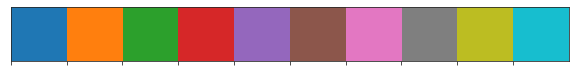

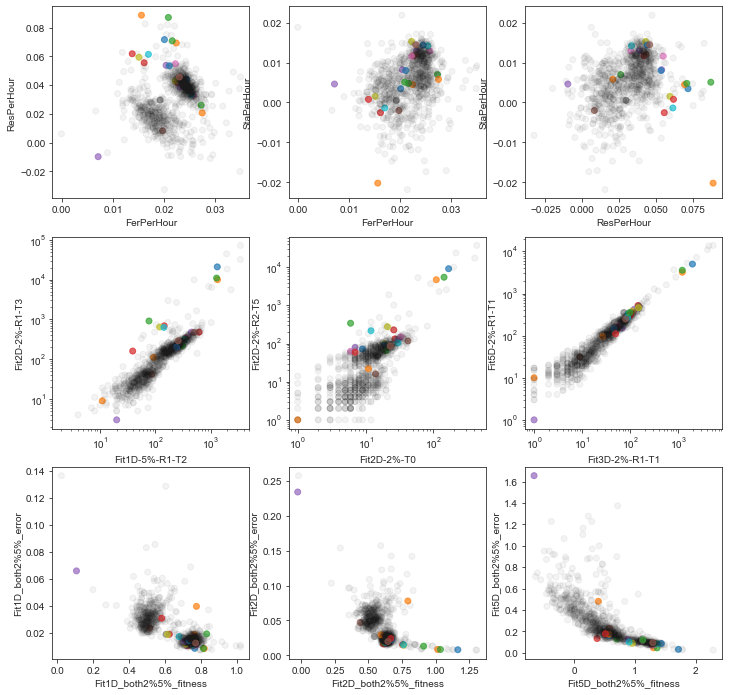

In [209]:
this_anc = 'CYR1'
this_anc = 'GPB2'
this_anc = 'TOR1'
# this_anc = 'IRA1_MIS'
# this_anc = 'IRA1_NON'

new_mutants = merged_fitness[(merged_fitness['source_publication']=='This_study') & (merged_fitness['ancestor']==this_anc)]
new_mutants = merged_fitness[merged_fitness['ancestor']==this_anc]

color_list = []
counter = 0
not_in_metagrid = []
for bc,clone_id in zip(new_mutants['barcode'].values,new_mutants['cloneID_new'].values):
#     if not p.isnull(clone_id):
#         color_list.append(colors.to_rgba('k',0.05))
#     else:
#         color_list.append(colors.to_rgba(sns.color_palette()[counter%len(sns.color_palette())],0.7))
#         not_in_metagrid.append(bc)
#         counter += 1
    if bc not in missing_targets[this_anc]:
        color_list.append(colors.to_rgba('k',0.05))
    else:
        color_list.append(colors.to_rgba(sns.color_palette()[counter%len(sns.color_palette())],0.7))
#         not_in_metagrid.append(bc)
        counter += 1 

# not_in_metagrid.append('TGATCAATCTACAAAAATATTTAATG_GAGTGAAACATGAATGGTATTCATCA')
# color_list.append(colors.to_rgba(sns.color_palette()[counter%len(sns.color_palette())],0.7))
        
sns.palplot(sns.color_palette())
print(not_in_metagrid)
axes_to_plot = [
               ['FerPerHour','ResPerHour'],
                ['FerPerHour','StaPerHour'],
                ['ResPerHour','StaPerHour'],
#                ['Fit2D-2%_fitness','Fit5D-2%_fitness'],
#                ['Fit1D-2%_fitness','Fit5D-2%_fitness'],
               ['Fit1D-5%-R1-T2','Fit2D-2%-R1-T3'],
               ['Fit2D-2%-T0','Fit2D-2%-R2-T5'],
               ['Fit3D-2%-R1-T1','Fit5D-2%-R1-T1'],
    
                ['Fit1D_both2%5%_fitness','Fit1D_both2%5%_error'],
                ['Fit2D_both2%5%_fitness','Fit2D_both2%5%_error'],
                ['Fit5D_both2%5%_fitness','Fit5D_both2%5%_error'],
    
               ]

plt.figure(figsize=(12,12))

for c,(x,y) in enumerate(axes_to_plot):
    plt.subplot(3,3,c+1)
    plt.scatter(new_mutants[x],
                new_mutants[y],color=color_list)
    plt.xlabel(x)
    plt.ylabel(y)
#     plt.legend()
    if 2 < c < 6:
        plt.xscale('log')
        plt.yscale('log')
        
patches = []
# for e,entry in enumerate(not_in_metagrid):
#     patches.append(mpatches.Patch(color=sns.color_palette()[e%len(sns.color_palette())], label=entry))
for e,entry in enumerate(missing_targets[this_anc]):
    patches.append(mpatches.Patch(color=sns.color_palette()[e%len(sns.color_palette())], label=entry))

font = font_manager.FontProperties(family='Mono',
#                                    weight='bold',
                                    size=10,
                                   style='normal')

# plt.legend(handles=patches,prop=font,loc=(-2.5,-0.8),ncol=2)

plt.savefig(f'MissingTargets_{this_anc}.pdf',bbox_inches='tight')

In [91]:
np.unique(merged_fitness[merged_fitness['ancestor']=='GPB2']['source_publication'].values,return_counts=True)

(array(['Aggeli2020', 'This_study'], dtype=object), array([1219,  479]))

In [92]:
np.unique(merged_fitness[merged_fitness['ancestor']=='GPB2']['evolution_condition'].values,return_counts=True)

(array(['Evo1D', 'Evo2D', 'Evo3D', 'unknown'], dtype=object),
 array([ 169, 1219,   34,  276]))

In [93]:
len(not_in_metagrid)

# are these really "new" or is Dimitra's list under-counting them?

276

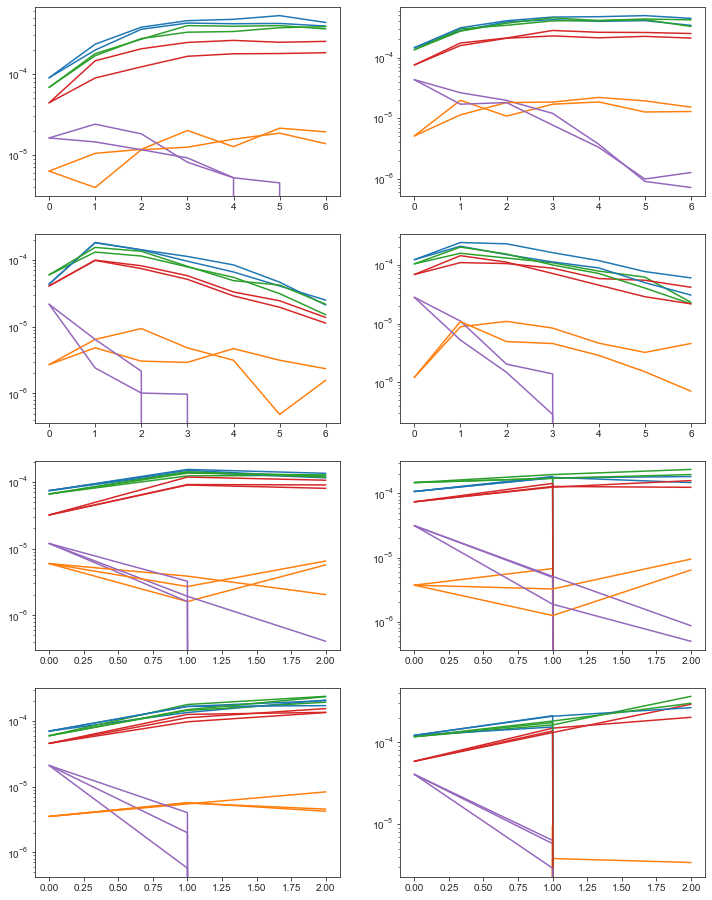

In [66]:
# all_bcs_here = [central_bc] + others

conditions_here = ['Fit1D-2%','Fit1D-5%','Fit2D-2%','Fit2D-5%','Fit3D-2%','Fit3D-5%','Fit5D-2%','Fit5D-5%']

these_bcs = merged_fitness[merged_fitness['barcode'].isin(not_in_metagrid)]

plt.figure(figsize=(12,16))
for c,condition in enumerate(conditions_here):
    plt.subplot(4,2,c+1)
    for rep in replicates[condition]:
        plt.gca().set_prop_cycle(None)
        these_ts = [f'{condition}-T0'] + [f'{condition}-R{rep}-T{tp}' for tp in range(1,timepoints[condition])]

#         these_ts = ['Fit1D-2%-T0','Fit1D-2%-R1-T1','Fit1D-2%-R1-T2','Fit1D-2%-R1-T3','Fit1D-2%-R1-T4','Fit1D-2%-R1-T5']
        # these_ts = ['Fit2D-2%-T0','Fit2D-2%-R1-T1','Fit2D-2%-R1-T2','Fit2D-2%-R1-T3','Fit2D-2%-R1-T5','Fit2D-2%-R1-T5']

        plt.plot(range(len(these_ts)),
                 (these_bcs[these_ts]/np.nansum(merged_fitness[these_ts].values,axis=0)).swapaxes(0,1))

        plt.yscale('log')

In [113]:
merged_fitness[['Fit1D_both2%5%_fitness',
 'Fit2D_early_fitness',
 'Fit3D_both2%5%_fitness',
 'Fit5D_both2%5%_fitness']]

['Fit1D_both2%5%_fitness',
 'Fit2D_early_fitness',
 'Fit3D_both2%5%_fitness',
 'Fit5D_both2%5%_fitness']

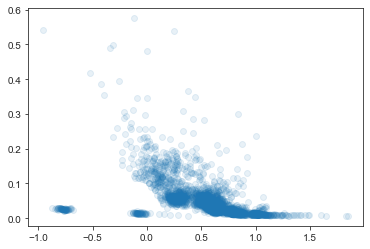

In [68]:
plt.scatter(merged_fitness['Fit2D_both2%5%_fitness'],merged_fitness['Fit2D_both2%5%_error'],alpha=0.1)

In [68]:
from sklearn.decomposition import PCA



<module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/__init__.py'>

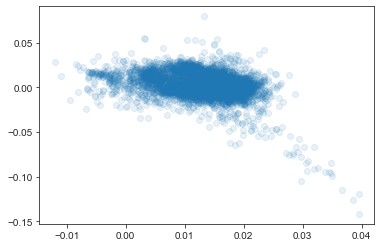

In [81]:
pca = PCA()

data = merged_fitness[['Fit1D_both2%5%_fitness',
 'Fit2D_early_fitness',
 'Fit3D_both2%5%_fitness',
 'Fit5D_both2%5%_fitness']].values.swapaxes(0,1)

pca.fit(data)

plt.scatter(pca.components_[0],pca.components_[1],alpha=0.1)
p

In [80]:
pca.explained_variance_ratio_

array([8.62660629e-01, 9.73749736e-02, 3.99643974e-02, 3.82949087e-31])

In [62]:
np.unique(merged_fitness[~p.isnull(merged_fitness['gene'])]['gene'])

array(['ARO80', 'BMH1', 'CYR1', 'Diploid', 'Diploid + Chr11Amp',
       'Diploid + Chr12Amp', 'Diploid + IRA1', 'Diploid + IRA2', 'FPK1',
       'FPK1+CYR1', 'GPB1', 'GPB2', 'GPR1', 'GSH1', 'HOG1', 'HOG1+SXM1',
       'II', 'IOC3+SXM1', 'IRA1', 'IRA2', 'KOG1', 'KSP1', 'LSM2',
       'LSM2+LSM2', 'MCM1', 'MCM1+VOA1', 'MKS1', 'MTC3', 'MTC3+MTC3',
       'NOT3', 'NUT2', 'NotSequenced', 'PBS2', 'PDE2', 'POX1+SXM1',
       'RAS2', 'RTG2', 'RTG2+SSM4', 'SCH9', 'SCM3', 'SMD2',
       'SMD2+NOT3+SCM3', 'SSK1', 'SSK2', 'SSM4', 'SXM1', 'SXM1+CYR1+NUT2',
       'SXM1+LSM2', 'SXM1+LSM2+LSM2', 'SXM1+NUT2', 'SXM1+POX1',
       'SXM1+SSK1+LSM2', 'SXM1+SXM1', 'SXM1+tL_GAG_G+MDN1+NUT2', 'TFB3',
       'TFB3+LSM2', 'TFS1', 'TOR1', 'VOA1', 'XI', 'XI+LSM2+LSM2',
       'XI+MDN1', 'YLR422W', 'YNR001W-A', 'other', 'tL_GAG_G',
       'tL_GAG_G+NUT2', 'tL_GAG_G+NUT2+YNR001W-A'], dtype=object)

In [63]:
fitness_df[p.isnull(fitness_df['gene'])]['gene'].values

NameError: name 'fitness_df' is not defined

In [65]:
merged_fitness[merged_fitness['gene'].isin(['GPB2'])]['Fit1D_both2%5%_fitness']

233     0.587177
278     0.536907
1106    0.571933
1134    0.539262
1185    0.609979
1449    0.566862
1925    0.540549
2353    0.790916
2527    0.812906
2791    0.575112
3112    0.565838
3493    0.545078
4245    0.557210
4521    0.541195
4693    0.583426
4753    0.567869
Name: Fit1D_both2%5%_fitness, dtype: float64

In [74]:
len(merged_fitness.values)

4995

In [72]:
np.unique([f'{anc}_{evo}' for anc,evo in zip(merged_fitness['ancestor'].values,
                                        merged_fitness['evolution_condition'].values)],return_counts=True)

(array(['CYR1_Evo1D', 'CYR1_Evo2D', 'CYR1_Evo3D', 'CYR1_unknown',
        'GPB2_Evo1D', 'GPB2_Evo2D', 'GPB2_Evo3D', 'GPB2_unknown',
        'IRA1_MIS_Evo1D', 'IRA1_MIS_Evo2D', 'IRA1_MIS_Evo3D',
        'IRA1_NON_Evo1D', 'IRA1_NON_Evo2D', 'IRA1_NON_Evo3D', 'TOR1_Evo1D',
        'TOR1_Evo2D', 'TOR1_Evo3D', 'TOR1_unknown', 'WT_Evo1D',
        'WT_Evo1_5D', 'WT_Evo2D', 'WT_Evo5D'], dtype='<U14'),
 array([ 211,  535,   35,    5,  169, 1219,   34,  276,  191,  143,   32,
          12,   95,  134,  203,  727,    2,    5,  112,  239,  506,  110]))

In [ ]:
['CYR1_Evo1D',211,
 'CYR1_Evo2D',535,
 'CYR1_Evo3D', 35,
 'GPB2_Evo1D',169,
 'GPB2_Evo2D', 1219,
 'GPB2_Evo3D', 34,
'IRA1_MIS_Evo1D',191,
 'IRA1_MIS_Evo2D',143,
 'IRA1_MIS_Evo3D',32,
'IRA1_NON_Evo1D',12, 
 'IRA1_NON_Evo2D', 95, 
 'IRA1_NON_Evo3D',134,
 'TOR1_Evo1D',203,
'TOR1_Evo2D', 727, 
 'TOR1_Evo3D',2, 
 'WT_Evo1D',112,
 'WT_Evo1_5D',239,
 'WT_Evo2D',506, 
 'WT_Evo5D',110